In [2]:
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.units import DistanceUnit

driver = PySCFDriver(
    atom="H 0 0 0; H 0 0 0.735",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)
problem = driver.run()
hamiltonian = problem.hamiltonian

In [3]:
from qiskit_nature.second_q.operators import PolynomialTensor
from qiskit_nature.second_q.properties import ElectronicDipoleMoment


dipole: ElectronicDipoleMoment  = problem.properties.electronic_dipole_moment

# if dipole is not None:
#     nuclear_dip = dipole.nuclear_dipole_moment
#     # Cập nhật moment lưỡng cực hạt nhân cho các thành phần x, y, z
#     dipole.x_dipole.alpha += PolynomialTensor({"": nuclear_dip[0]})
#     dipole.y_dipole.alpha += PolynomialTensor({"": nuclear_dip[1]})
#     dipole.z_dipole.alpha += PolynomialTensor({"": nuclear_dip[2]})
#     print("Đã thêm moment lưỡng cực hạt nhân vào.")
# else:
#     print("Moment lưỡng cực không tồn tại trong problem.")

# # Kiểm tra coefficients của Hamiltonian
# coefficients = hamiltonian.electronic_integrals

Dipole operator $  \hat{D} $


In [4]:
from qiskit_nature.second_q.mappers import JordanWignerMapper

mapper = JordanWignerMapper()

dipole_ops = dipole.second_q_ops()
print("Nội dung của dipole_ops:", dipole_ops)

# Lấy toán tử moment lưỡng cực từ phương Z (vì X và Y rỗng)
x_dipole_op = dipole_ops["XDipole"]
y_dipole_op = dipole_ops["YDipole"]
z_dipole_op = dipole_ops["ZDipole"]

print("Toán tử moment lưỡng cực X:", x_dipole_op)
print("Toán tử moment lưỡng cực Y:", y_dipole_op)
print("Toán tử moment lưỡng cực Z:", z_dipole_op)

qubit_dipole_ops = {
    "XDipole": mapper.map(x_dipole_op),
    "YDipole": mapper.map(y_dipole_op),
    "ZDipole": mapper.map(z_dipole_op),
}
# x_dipole_qubit = mapper.map(x_dipole_op)
# y_dipole_qubit = mapper.map(y_dipole_op)
# z_dipole_qubit = mapper.map(z_dipole_op)

# x_dipole_matrix = x_dipole_op.to_matrix()
# y_dipole_matrix = y_dipole_op.to_matrix()
# z_dipole_matrix = z_dipole_op.to_matrix() # Dipole dưới dạng SparsePauliOp

qubit_dipole_ops_matrix = {
    "XDipole": qubit_dipole_ops["XDipole"].to_matrix(),
    "YDipole": qubit_dipole_ops["YDipole"].to_matrix(),
    "ZDipole": qubit_dipole_ops["ZDipole"].to_matrix(),
}
# print("Toán tử moment lưỡng cực X dưới dạng ma trận:", qubit_dipole_ops_matrix["XDipole"])
# print("Toán tử moment lưỡng cực Y dưới dạng ma trận:", qubit_dipole_ops_matrix["YDipole"])
# print("Toán tử moment lưỡng cực Z dưới dạng ma trận:", qubit_dipole_ops_matrix["ZDipole"])

# dipole_operators = qubit_dipole_ops_matrix["XDipole"] + qubit_dipole_ops_matrix["YDipole"] + qubit_dipole_ops_matrix["ZDipole"]
# print("Toán tử moment lưỡng cực tổng hợp dưới dạng ma trận:", dipole_operators)

Nội dung của dipole_ops: {'XDipole': FermionicOp({}, num_spin_orbitals=4, ), 'YDipole': FermionicOp({}, num_spin_orbitals=4, ), 'ZDipole': FermionicOp({'+_0 -_0': 0.6944743507776598, '+_0 -_1': -0.927833470459232, '+_1 -_0': -0.9278334704592321, '+_1 -_1': 0.6944743507776604, '+_2 -_2': 0.6944743507776598, '+_2 -_3': -0.927833470459232, '+_3 -_2': -0.9278334704592321, '+_3 -_3': 0.6944743507776604}, num_spin_orbitals=4, )}
Toán tử moment lưỡng cực X: Fermionic Operator
number spin orbitals=4, number terms=0
  
Toán tử moment lưỡng cực Y: Fermionic Operator
number spin orbitals=4, number terms=0
  
Toán tử moment lưỡng cực Z: Fermionic Operator
number spin orbitals=4, number terms=8
  0.6944743507776598 * ( +_0 -_0 )
+ -0.927833470459232 * ( +_0 -_1 )
+ -0.9278334704592321 * ( +_1 -_0 )
+ 0.6944743507776604 * ( +_1 -_1 )
+ 0.6944743507776598 * ( +_2 -_2 )
+ -0.927833470459232 * ( +_2 -_3 )
+ -0.9278334704592321 * ( +_3 -_2 )
+ 0.6944743507776604 * ( +_3 -_3 )


In [36]:
#print("Coefficients của Hamiltonian:", coefficients.alpha)

In [5]:
second_q_op = hamiltonian.second_q_op()


In [6]:
print(second_q_op)

Fermionic Operator
number spin orbitals=4, number terms=36
  -1.25633907300325 * ( +_0 -_0 )
+ -0.47189600728114184 * ( +_1 -_1 )
+ -1.25633907300325 * ( +_2 -_2 )
+ -0.47189600728114184 * ( +_3 -_3 )
+ 0.33785507740175813 * ( +_0 +_0 -_0 -_0 )
+ 0.33229086512764816 * ( +_0 +_1 -_1 -_0 )
+ 0.33785507740175813 * ( +_0 +_2 -_2 -_0 )
+ 0.33229086512764816 * ( +_0 +_3 -_3 -_0 )
+ 0.0904655998921157 * ( +_0 +_0 -_1 -_1 )
+ 0.0904655998921157 * ( +_0 +_1 -_0 -_1 )
+ 0.0904655998921157 * ( +_0 +_2 -_3 -_1 )
+ 0.0904655998921157 * ( +_0 +_3 -_2 -_1 )
+ 0.0904655998921157 * ( +_1 +_0 -_1 -_0 )
+ 0.0904655998921157 * ( +_1 +_1 -_0 -_0 )
+ 0.0904655998921157 * ( +_1 +_2 -_3 -_0 )
+ 0.0904655998921157 * ( +_1 +_3 -_2 -_0 )
+ 0.33229086512764816 * ( +_1 +_0 -_0 -_1 )
+ 0.34928686136600906 * ( +_1 +_1 -_1 -_1 )
+ 0.33229086512764816 * ( +_1 +_2 -_2 -_1 )
+ 0.34928686136600906 * ( +_1 +_3 -_3 -_1 )
+ 0.33785507740175813 * ( +_2 +_0 -_0 -_2 )
+ 0.33229086512764816 * ( +_2 +_1 -_1 -_2 )
+ 0.33785507740

Transform

In [6]:
from qiskit_nature.second_q.mappers import JordanWignerMapper

mapper = JordanWignerMapper()
qubit_jw_op = mapper.map(second_q_op) # H_0 dưới dạng SparsePauliOp

In [40]:
print(qubit_jw_op)


SparsePauliOp(['IIII', 'IIIZ', 'IIZI', 'IZII', 'ZIII', 'IIZZ', 'IZIZ', 'ZIIZ', 'YYYY', 'XXYY', 'YYXX', 'XXXX', 'IZZI', 'ZIZI', 'ZZII'],
              coeffs=[-0.81054798+0.j,  0.17218393+0.j, -0.22575349+0.j,  0.17218393+0.j,
 -0.22575349+0.j,  0.12091263+0.j,  0.16892754+0.j,  0.16614543+0.j,
  0.0452328 +0.j,  0.0452328 +0.j,  0.0452328 +0.j,  0.0452328 +0.j,
  0.16614543+0.j,  0.17464343+0.j,  0.12091263+0.j])


VQE

In [36]:

from qiskit_nature.second_q.circuit.library import HartreeFock, UCC

ansatz = UCC(
    num_spatial_orbitals = problem.num_spatial_orbitals, #2
    num_particles = problem.num_particles, # [1, 1]
    excitations='sd',
    qubit_mapper=mapper,
    initial_state=HartreeFock(
        num_spatial_orbitals = problem.num_spatial_orbitals,
        num_particles = problem.num_particles, 
        qubit_mapper=mapper,
    ),
    reps=1,

)

In [37]:
import numpy as np 
from qiskit.primitives import Estimator
from qiskit_algorithms.optimizers import COBYLA , SLSQP, L_BFGS_B, SPSA, NELDER_MEAD
from qiskit_algorithms import VQE
#from qiskit.utils import QuantumInstance

estimator = Estimator()
optimizer = SLSQP(maxiter=200)
vqe = VQE(estimator, ansatz, optimizer)
res = vqe.compute_minimum_eigenvalue(qubit_jw_op)

In [38]:
print(res)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 34,
    'eigenvalue': -1.8572750291832625,
    'optimal_circuit': <qiskit_nature.second_q.circuit.library.ansatzes.ucc.UCC object at 0x7f02f70ba050>,
    'optimal_parameters': {   ParameterVectorElement(t[1]): 1.5708327992266216,
                              ParameterVectorElement(t[0]): 4.712375892250982,
                              ParameterVectorElement(t[2]): 1.4590281620525796},
    'optimal_point': array([4.71237589, 1.5708328 , 1.45902816]),
    'optimal_value': -1.8572750291832625,
    'optimizer_evals': None,
    'optimizer_result': <qiskit_algorithms.optimizers.optimizer.OptimizerResult object at 0x7f02f739f160>,
    'optimizer_time': 0.38097548484802246}


In [55]:
from qiskit_algorithms.eigensolvers import NumPyEigensolver

numpy_solver = NumPyEigensolver()
exact_result = numpy_solver.compute_eigenvalues(qubit_jw_op)
ref_value = exact_result.eigenvalues
print(f"Reference value: {ref_value  }")
print(f"VQE values: {res.optimal_value }")
print(f"Delta from reference energy value is {(res.optimal_value - ref_value)}")

Reference value: [-1.85727503]
VQE values: -1.8572750291832625
Delta from reference energy value is [1.01911768e-09]


Static Hamiltonian $H_0$

In [12]:

from qiskit.quantum_info import SparsePauliOp
H_0 = qubit_jw_op # H_0 (static) dưới dạng SparsePauliOp
H_static = H_0.to_matrix()  # Matrix of H_0


In [46]:
print(H_0)

SparsePauliOp(['IIII', 'IIIZ', 'IIZI', 'IZII', 'ZIII', 'IIZZ', 'IZIZ', 'ZIIZ', 'YYYY', 'XXYY', 'YYXX', 'XXXX', 'IZZI', 'ZIZI', 'ZZII'],
              coeffs=[-0.81054798+0.j,  0.17218393+0.j, -0.22575349+0.j,  0.17218393+0.j,
 -0.22575349+0.j,  0.12091263+0.j,  0.16892754+0.j,  0.16614543+0.j,
  0.0452328 +0.j,  0.0452328 +0.j,  0.0452328 +0.j,  0.0452328 +0.j,
  0.16614543+0.j,  0.17464343+0.j,  0.12091263+0.j])


In [47]:
print("Ma trận Hamiltonian tĩnh:,", H_static)

Ma trận Hamiltonian tĩnh:, [[ 9.71445147e-17+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j -1.25633907e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j -4.71896007e-01+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0

In [48]:
print("Moment lưỡng cực qubit dưới dạng Sparse Pauli Ops:", qubit_dipole_ops["ZDipole"])

Moment lưỡng cực qubit dưới dạng Sparse Pauli Ops: SparsePauliOp(['IIII', 'IIIZ', 'IIYY', 'IIXX', 'IIZI', 'IZII', 'YYII', 'XXII', 'ZIII'],
              coeffs=[ 1.3889487 +0.j, -0.34723718+0.j, -0.46391674+0.j, -0.46391674+0.j,
 -0.34723718+0.j, -0.34723718+0.j, -0.46391674+0.j, -0.46391674+0.j,
 -0.34723718+0.j])


In [7]:
z_dipole_qubit = qubit_dipole_ops["ZDipole"]  # Toán tử moment lưỡng cực Z dưới dạng SparsePauliOp
z_dipole_matrix = z_dipole_qubit.to_matrix()  # Ma trận của toán tử moment lưỡng cực Z

Time-dependent Hamiltonian $ H(t) = H_0 + V(t) $

In [8]:
# Hàm tính Hamiltonian H(t) đã chuyển thành ma trận
def Hamilton(t, H_static, z_dipole_matrix, E0, Gamma):
    E_t = (E0 / np.pi) * Gamma / (Gamma**2 + t**2)
    V_t = E_t*z_dipole_matrix
    H_total = H_static + V_t
    return H_total

In [9]:
# Hàm tính Hamiltonian H(t) dạng SparsePauliOp
def Hamilton_SP(t, H_0, z_dipole_qubit, E0, Gamma):
    t_float = float(t)  # Chuyển đổi t sang float 
    E_t = (E0 / np.pi) * Gamma / (Gamma**2 + t_float**2)
    V_t = E_t*z_dipole_qubit
    H_total_q = H_0 + V_t
    return H_total_q

Unitary time-evolution operator  $ U(t) = Texp(-i\int_{0}^{T} H(s) \, ds )$

In [9]:
import qiskit

from scipy.linalg import expm
def time_dependent(num_qubits : int , H_total_t,t):
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    for qubit in range(num_qubits//2, num_qubits):
        qc.x(qubit)

    if not np.allclose(H_total_t(t).to_matrix(), np.conj(H_total_t(t).to_matrix()).T):    
        raise ValueError("The Hamiltonian is not Hermitian.")    
    
    time_points = np.linspace(0,t,100)

    # Calculate the integral of H(t) using numerical approximation (e.g., trapezoidal rule)
    integral = np.zeros_like(H_total_t, dtype=complex)

    for i in range(len(time_points) - 1):
        dt = float(time_points[i+1] - time_points[i])
        integral += (H_total_t(time_points[i]) + H_total_t(time_points[i + 1])) / 2 * dt

   # Compute the matrix exponential
    U = expm(-1j * integral)  

      # Check if U is unitary
    if not np.allclose(U @ U.conj().T, np.eye(U.shape[0])):
        raise ValueError("The resulting matrix U is not unitary.")
        
    #return U matrix
    """
    # Create a UnitaryGate from the unitary_matrix
    unitary_gate = UnitaryGate(U)

    # Append the unitary_gate to the quantum circuit
    qc.append(unitary_gate, range(qc.num_qubits))
    """
    # from qoop.core.state import specific_matrix
    
    # return specific_matrix(U)
    return U
    

def time_dependent_integral(H_total_t, t):
    """create U circuit from h_opt and time t
    
    Args:
        - qc (QuantumCircuit): Init circuit
        - h_opt: Hamiltonian
        - t (float): time
        
    Returns:
        - QuantumCircuit: the added circuit
    """
    # Ensure h_opt is Hermitian
    if not np.allclose((H_total_t(t).to_matrix()), np.conj(H_total_t(t).to_matrix()).T):
        raise ValueError("The Hamiltonian is not Hermitian.")

    time_points = np.linspace(0, t, 100)
    # Calculate the integral of H(t) using numerical approximation (e.g., trapezoidal rule)
    integral = np.zeros_like(H_total_t, dtype=complex)  # Initialize integral as a matrix
    
    for i in range(len(time_points) - 1):
        dt = float(time_points[i + 1] - time_points[i])
        integral += (H_total_t(time_points[i]) + H_total_t(time_points[i + 1])) / 2 * dt

    return integral    


In [12]:
def H_time(t):
    Gamma = 0.25
    E0 = 0.01
    return Hamilton_SP(t, H_0, z_dipole_qubit, E0, Gamma)

In [15]:
tichphan = time_dependent_integral(H_time, 10)
print("Tích phân Hamiltonian:", tichphan)

Tích phân Hamiltonian: SparsePauliOp(['IIII', 'IIIZ', 'IIZI', 'IIZZ', 'IZII', 'IZIZ', 'ZIII', 'ZIIZ', 'YYYY', 'XXYY', 'YYXX', 'XXXX', 'IZZI', 'ZIZI', 'ZZII', 'IIII', 'IIIZ', 'IIYY', 'IIXX', 'IIZI', 'IZII', 'YYII', 'XXII', 'ZIII', 'IIII', 'IIIZ', 'IIZI', 'IIZZ', 'IZII', 'IZIZ', 'ZIII', 'ZIIZ', 'YYYY', 'XXYY', 'YYXX', 'XXXX', 'IZZI', 'ZIZI', 'ZZII', 'IIII', 'IIIZ', 'IIYY', 'IIXX', 'IIZI', 'IZII', 'YYII', 'XXII', 'ZIII', 'IIII', 'IIIZ', 'IIZI', 'IIZZ', 'IZII', 'IZIZ', 'ZIII', 'ZIIZ', 'YYYY', 'XXYY', 'YYXX', 'XXXX', 'IZZI', 'ZIZI', 'ZZII', 'IIII', 'IIIZ', 'IIYY', 'IIXX', 'IIZI', 'IZII', 'YYII', 'XXII', 'ZIII', 'IIII', 'IIIZ', 'IIZI', 'IIZZ', 'IZII', 'IZIZ', 'ZIII', 'ZIIZ', 'YYYY', 'XXYY', 'YYXX', 'XXXX', 'IZZI', 'ZIZI', 'ZZII', 'IIII', 'IIIZ', 'IIYY', 'IIXX', 'IIZI', 'IZII', 'YYII', 'XXII', 'ZIII', 'IIII', 'IIIZ', 'IIZI', 'IIZZ', 'IZII', 'IZIZ', 'ZIII', 'ZIIZ', 'YYYY', 'XXYY', 'YYXX', 'XXXX', 'IZZI', 'ZIZI', 'ZZII', 'IIII', 'IIIZ', 'IIYY', 'IIXX', 'IIZI', 'IZII', 'YYII', 'XXII', 'ZIII', 'I

In [13]:
num_qubits = H_0.num_qubits
U_tp = time_dependent(num_qubits, H_time, 10)
print("Ma trận U(t):", U_tp)

NameError: name 'time_dependent' is not defined

 GA-VQA


In [56]:
import sys, qiskit
sys.path.insert(0, '../../..')
import matplotlib.pyplot as plt
import numpy as np
import qoop
from qoop.compilation.qsp import QuantumStatePreparation
from qoop.core import ansatz, state, random_circuit
from qoop.backend import constant, utilities
from qoop.evolution import crossover, mutate, selection, threshold
from qoop.evolution.environment import EEnvironment, EEnvironmentMetadata
import pickle
import model
import os

num_qubits = H_0.num_qubit  #4

def H_time(t):
    Gamma = 0.25
    E0 = 0.01
    return Hamilton_SP(t, H_0, z_dipole_qubit, E0, Gamma)

def compilation_fitness(qc: qiskit.QuantumCircuit):
    p0s = []
    times = np.linspace(0,10,100)
    for time in times:
        qsp = QuantumStatePreparation(
            u=qc,
            target_state = time_dependent(num_qubits,H_time,time).inverse()
            ).fit(num_steps=300, metrics_func=['loss_basic'])
        p0s.append(1-qsp.compiler.metrics['loss_basic'][-1])
        #time_folder = os.path.join(f"times_{mod}/times= {time}")
        #os.makedirs(time_folder, exist_ok=True)
        #qsp.save(f"times_{mod}/times= {time}")
        
    return np.mean(p0s)

def super_evol(_depth, _num_circuit, _num_generation):
    env_metadata = EEnvironmentMetadata(
        num_qubits = num_qubits,
        depth = _depth,
        num_circuit = _num_circuit,
        num_generation = _num_generation,
        prob_mutate=3/(_depth * _num_circuit)
    )
    env = EEnvironment(
        metadata = env_metadata,
        fitness_func= compilation_fitness,
        selection_func=selection.elitist_selection,
        crossover_func=crossover.onepoint_crossover,
        mutate_func=mutate.layerflip_mutate,
        threshold_func=threshold.compilation_threshold
    )
    #env.set_filename(f'n={mod},d={_depth},n_circuit={_num_circuit},n_gen={_num_generation}')
    env.evol()
    print('done')
    
# main
if __name__ == '__main__':
    num_qubits = 4
    super_evol(4,8,16)

AttributeError: 'SparsePauliOp' object has no attribute 'num_qubit'

Compilation


In [11]:
def H_time(t):
    Gamma = 0.25
    E0 = 0.01
    return Hamilton_SP(t, H_0, z_dipole_qubit, E0, Gamma)

$H(t) = \sum_k c_k(t) P_k$

In [ ]:
T = 10
labels = time_dependent_integral(H_time,t=T).paulis.to_labels()
coeffs = time_dependent_integral(H_time,t=T).coeffs
coeffs = np.real(coeffs)

Test thử mạch bất kỳ

In [ ]:
from qoop.compilation.qsp import QuantumStatePreparation
import qiskit
from qiskit.circuit import ParameterVector
import numpy as np

p0s = []
N = 4

times = np.linspace(0,10,4)
# qc = trotter_circuit(N,labels, coeffs, T, M=100)

def extended_qsearch_ansatz_4q(num_qubits: int, num_layers: int):
    if num_qubits != 4:
        raise ValueError("Ansatz này được thiết kế cho 4 qubits.")
    
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits) # Có classical bits
    
    # Cần 2 * num_layers tham số cho mỗi cặp qubit (0,1) và (2,3)
    # Tổng cộng 4 * num_layers tham số
    thetas = ParameterVector('theta', 4 * num_layers) 
    param_idx = 0

    for _ in range(num_layers):
        # Lớp tác động lên qubit 0 và 1 (tương tự qsearch_ansatz gốc)
        qc.rx(np.pi / 2, 0)
        qc.rx(np.pi / 2, 1)
        qc.cx(0, 1)
        qc.rx(thetas[param_idx], 0)
        param_idx += 1
        qc.rx(thetas[param_idx], 1)
        param_idx += 1
        qc.cx(0, 1)
        qc.rx(np.pi / 2, 0)
        qc.rx(np.pi / 2, 1)
        qc.barrier() # Thêm barrier để dễ nhìn (tùy chọn)

        # Lớp tác động lên qubit 2 và 3 (lặp lại cấu trúc)
        qc.rx(np.pi / 2, 2)
        qc.rx(np.pi / 2, 3)
        qc.cx(2, 3)
        qc.rx(thetas[param_idx], 2)
        param_idx += 1
        qc.rx(thetas[param_idx], 3)
        param_idx += 1
        qc.cx(2, 3)
        qc.rx(np.pi / 2, 2)
        qc.rx(np.pi / 2, 3)
        qc.barrier() # Tùy chọn

        # Thêm cổng vướng víu giữa các cặp (ví dụ: 1 và 2) để kết nối
        # Nếu không có bước này, hai cặp (0,1) và (2,3) sẽ tiến hóa độc lập
        if num_layers > 0: # Chỉ thêm nếu có lớp
            qc.cx(1,2) # Ví dụ một cổng CNOT để vướng víu
            qc.barrier()

    return qc

num_qubits = 4
# qc_ansatz_4q = extended_qsearch_ansatz_4q(num_qubits_total, num_layers=1) 
# print(qc_ansatz_4q.draw(output='text'))
for time in times:
    qsp = QuantumStatePreparation(
        u= extended_qsearch_ansatz_4q(num_qubits, 1),
        target_state= time_dependent(num_qubits,H_time,time).inverse()
        ).fit(num_steps=30, metrics_func=['loss_basic','compilation_trace_fidelities'])
    p0s.append(1-qsp.compiler.metrics['loss_basic'][-1])

print('Fidelity',p0s)



Fidelity [0.9947690807199545, 0.9947690807199548, 0.9947690807199546, 0.9947690807199541]


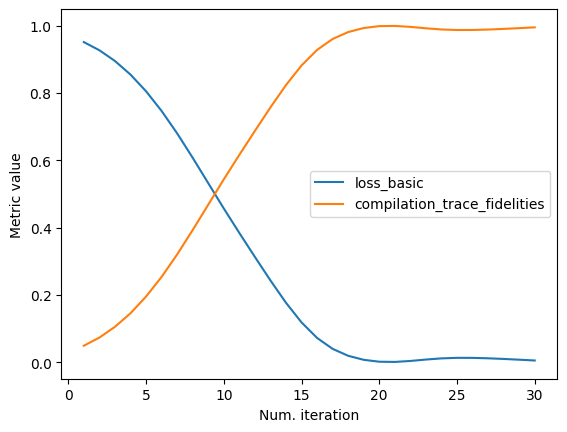

In [ ]:
qsp.plot()

Single Layer


$ U(\vec{\theta}) =\prod_ke^{-i\theta_k P_k} = e^{-i\theta_{LM}P_M}...e^{-i\theta_{L,1}P_1}$

$ \theta_{L} = (\theta_{L,1}....\theta_{L,M}) $

Multi Layer

$ U(\vec{\theta)} = \prod_L (\prod_k e^{(-i * \theta_{Lk} * P_k)}). $

$ U(\theta) = U_{N_L}(\theta_{N_L})U_{N_{L-1}}(\theta_{N_{L-1}}) .... U_1(\theta_{1}) $

In [14]:
from qiskit.circuit import Parameter, QuantumCircuit, ParameterVector
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.quantum_info import Pauli
import numpy as np

num_qubits = H_0.num_qubits

def create_parameterized_hamiltonian_ansatz(num_qubits, pauli_labels, num_layers, initial_coeffs_values=None, add_classical_bits=True):
    """
    Tạo một Hamiltonian ansatz có tham số U(theta) = product_L (product_k exp(-i * theta_Lk * P_k)).

    Args:
        num_qubits (int): Số qubit.
        pauli_labels (list[str]): Danh sách các chuỗi Pauli CỐ ĐỊNH (P_k).
        num_layers (int): Số lớp (N_L) của ansatz.
        initial_coeffs_values (list[float] or np.ndarray, optional): 
                               Giá trị khởi tạo cho các tham số theta. 
                               Nếu num_layers > 1, đây có thể là một mảng 1D dẹt (flattened)
                               hoặc có thể cấu trúc nó theo lớp. 
                               Độ dài phải là len(pauli_labels_fixed) * num_layers.
        add_classical_bits (bool): Nếu True, thêm bit cổ điển.

    Returns:
        qiskit.QuantumCircuit: Mạch lượng tử ansatz có tham số.
        list[Parameter]: Danh sách tất cả các tham số đã tạo (dạng dẹt).
    """
    if not pauli_labels:
        raise ValueError("pauli_labels không được rỗng.")
    
    circuit = QuantumCircuit(num_qubits)

    total_parameters = len(pauli_labels) * num_layers # Tạo tham số $ \theta_{Lk}$ nhiều lớp thì nhân thêm num_layers
    params_vector = ParameterVector('θ', total_parameters) # \theta_{Lk} là một vector tham số
    
    all_parameters_list = list(params_vector) # Danh sách các đối tượng Parameter

    param_idx_counter = 0   
    for _ in range(num_layers): # Lặp qua các lớp
        for pauli_str in pauli_labels: # Lặp qua các toán tử Pauli cố định
            if not pauli_str or len(pauli_str) != num_qubits:
                raise ValueError(f"Chuỗi Pauli '{pauli_str}' không hợp lệ.")
            # Tạo toán tử Pauli từ chuỗi
            current_pauli_operator = Pauli(pauli_str)
            # time trong PauliEvolutionGate bây giờ là một Parameter
            param_coeff = params_vector[param_idx_counter]
            param_idx_counter += 1
            
            evolution_gate = PauliEvolutionGate(current_pauli_operator, time=param_coeff) 
            circuit.append(evolution_gate, range(num_qubits))
        if num_layers > 1 : # Thêm barrier giữa các lớp nếu có nhiều lớp
            circuit.barrier()
    
    return circuit, all_parameters_list


In [15]:
# 1. Lấy các chuỗi Pauli CỐ ĐỊNH từ Hamiltonian 
# Đây sẽ là CƠ SỞ P_k cho ansatz 
# Có thể lấy chúng từ H_int(T) , hoặc trực tiếp từ H(t)
# nếu các P_k không thay đổi theo thời gian (chỉ có hệ số lambda_j(t) thay đổi).
# Dựa trên H_total1 = Hopt + f(t)*dipole_qubit, các P_k là cố định.

# Lấy labels từ Hopt (phần tĩnh)
static_pauli_op = H_0 
static_labels = static_pauli_op.paulis.to_labels()

# Lấy labels từ dipole_qubit (phần tương tác)
dipole_pauli_op = z_dipole_qubit
dipole_interaction_labels = dipole_pauli_op.paulis.to_labels()

# Kết hợp danh sách labels và loại bỏ trùng lặp. QUAN TRỌNG: Giữ thứ tự nhất quán.
# Cách tốt nhất là tạo một SparsePauliOp tổng H(t) = H_0 + f(t)*dipole_qubit rồi lấy paulis từ đó.
#  Tuy nhiên, f(t) là số, nên paulis của H(t) sẽ giống paulis của (H_0 + dipole_qubit) nếu không có sự triệt tiêu.
# Để đơn giản, ta có thể lấy một bộ cơ sở Pauli từ H_0 và dipole_qubit.
# Tạo một bộ cơ sở các Pauli strings duy nhất từ cả H_0 và dipole_qubit
# Cách này đảm bảo không trùng lặp và có thứ tự nhất quán nếu dùng dict.fromkeys

combined_unique_labels = list(dict.fromkeys(static_labels + dipole_interaction_labels))


# 2. Tạo Ansatz U(theta)
num_qubits = H_0.num_qubits
N = num_qubits # num_qubits = 4
num_ansatz_layers = 1 # Số lớp cho ansatz

# Tạo ansatz và danh sách các tham số có thể tối ưu
# Bây giờ, 'combined_unique_labels' sẽ là P_k cố định 
# và các 'theta_k' sẽ được tạo bên trong hàm này

ansatz_u, optimizable_parameters = create_parameterized_hamiltonian_ansatz(
    num_qubits=N,
    pauli_labels=combined_unique_labels,
    num_layers=num_ansatz_layers,
    # add_classical_bits=True # Giữ True để nhất quán với target_state nếu nó có clbits
    # initial_coeffs_values có thể được truyền vào optimizer sau
)

print("Ansatz U(theta) được tạo:")
print(ansatz_u.draw(output='text'))
print(f"Số lượng tham số có thể tối ưu: {len(optimizable_parameters)}")
print(f"Các tham số: {optimizable_parameters}")


Ansatz U(theta) được tạo:
     ┌──────────────────────┐┌──────────────────────┐┌──────────────────────┐»
q_0: ┤0                     ├┤0                     ├┤0                     ├»
     │                      ││                      ││                      │»
q_1: ┤1                     ├┤1                     ├┤1                     ├»
     │  exp(-it IIII)(θ[0]) ││  exp(-it IIIZ)(θ[1]) ││  exp(-it IIZI)(θ[2]) │»
q_2: ┤2                     ├┤2                     ├┤2                     ├»
     │                      ││                      ││                      │»
q_3: ┤3                     ├┤3                     ├┤3                     ├»
     └──────────────────────┘└──────────────────────┘└──────────────────────┘»
«     ┌──────────────────────┐┌──────────────────────┐┌──────────────────────┐»
«q_0: ┤0                     ├┤0                     ├┤0                     ├»
«     │                      ││                      ││                      │»
«q_1: ┤1               

In [50]:
print(ansatz_u.depth())

19


In [51]:
print(ansatz_u.num_parameters)

19


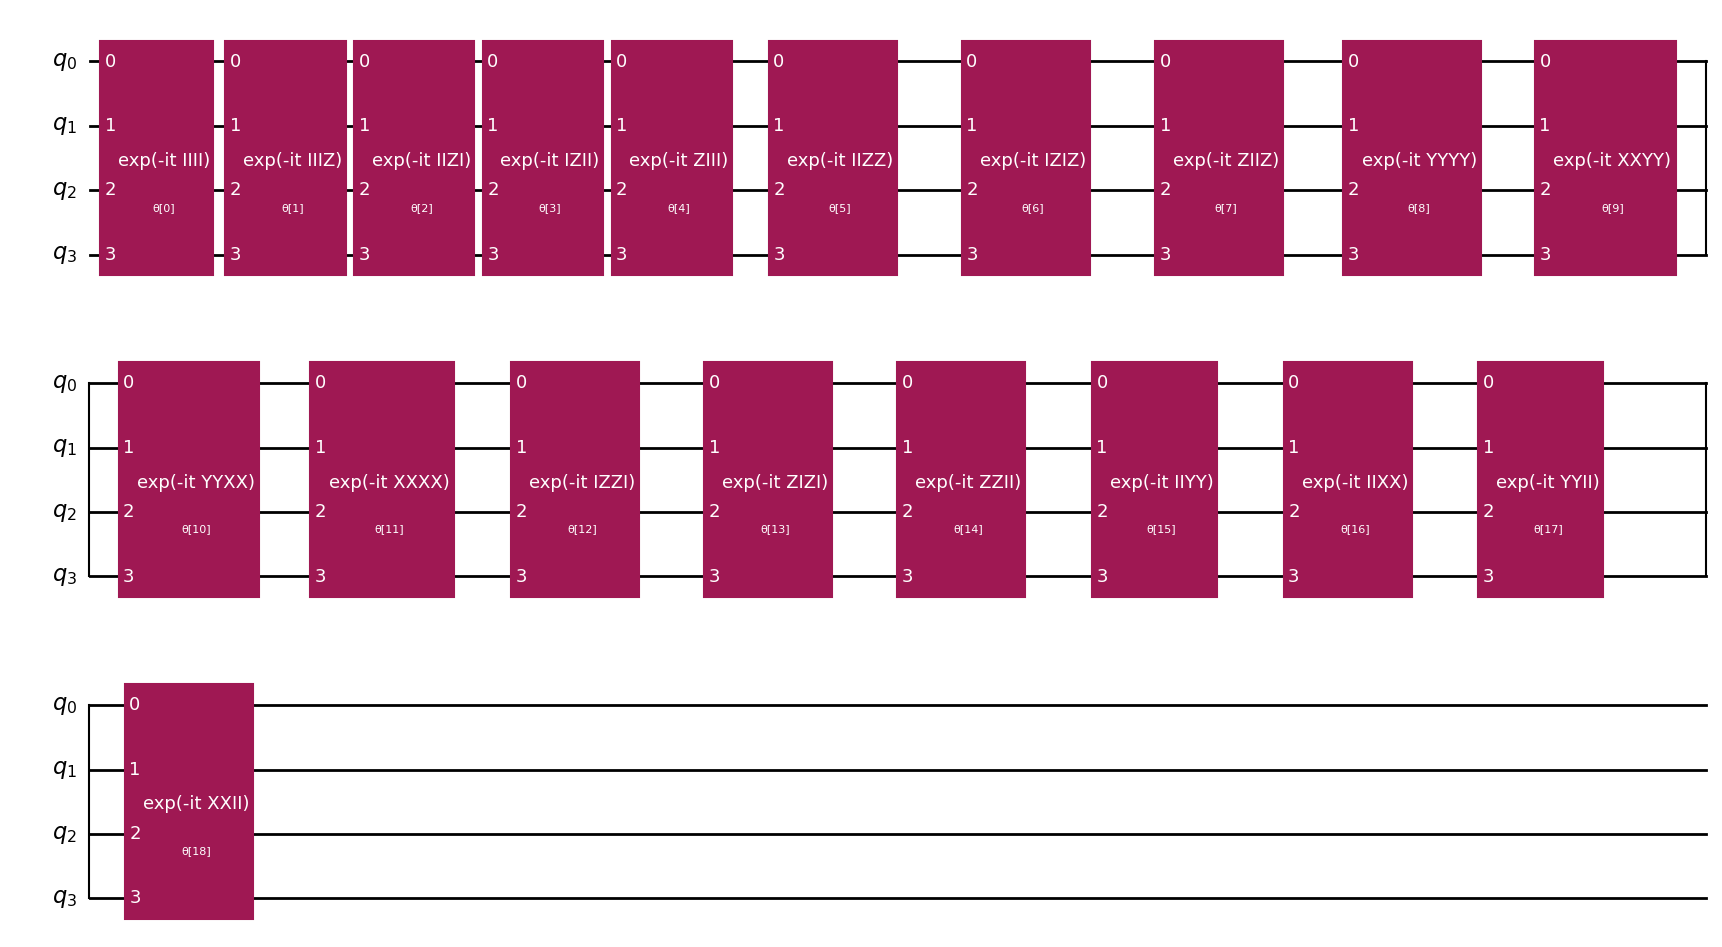

In [16]:
ansatz_u.draw('mpl')


Mạch sau khi biên dịch :


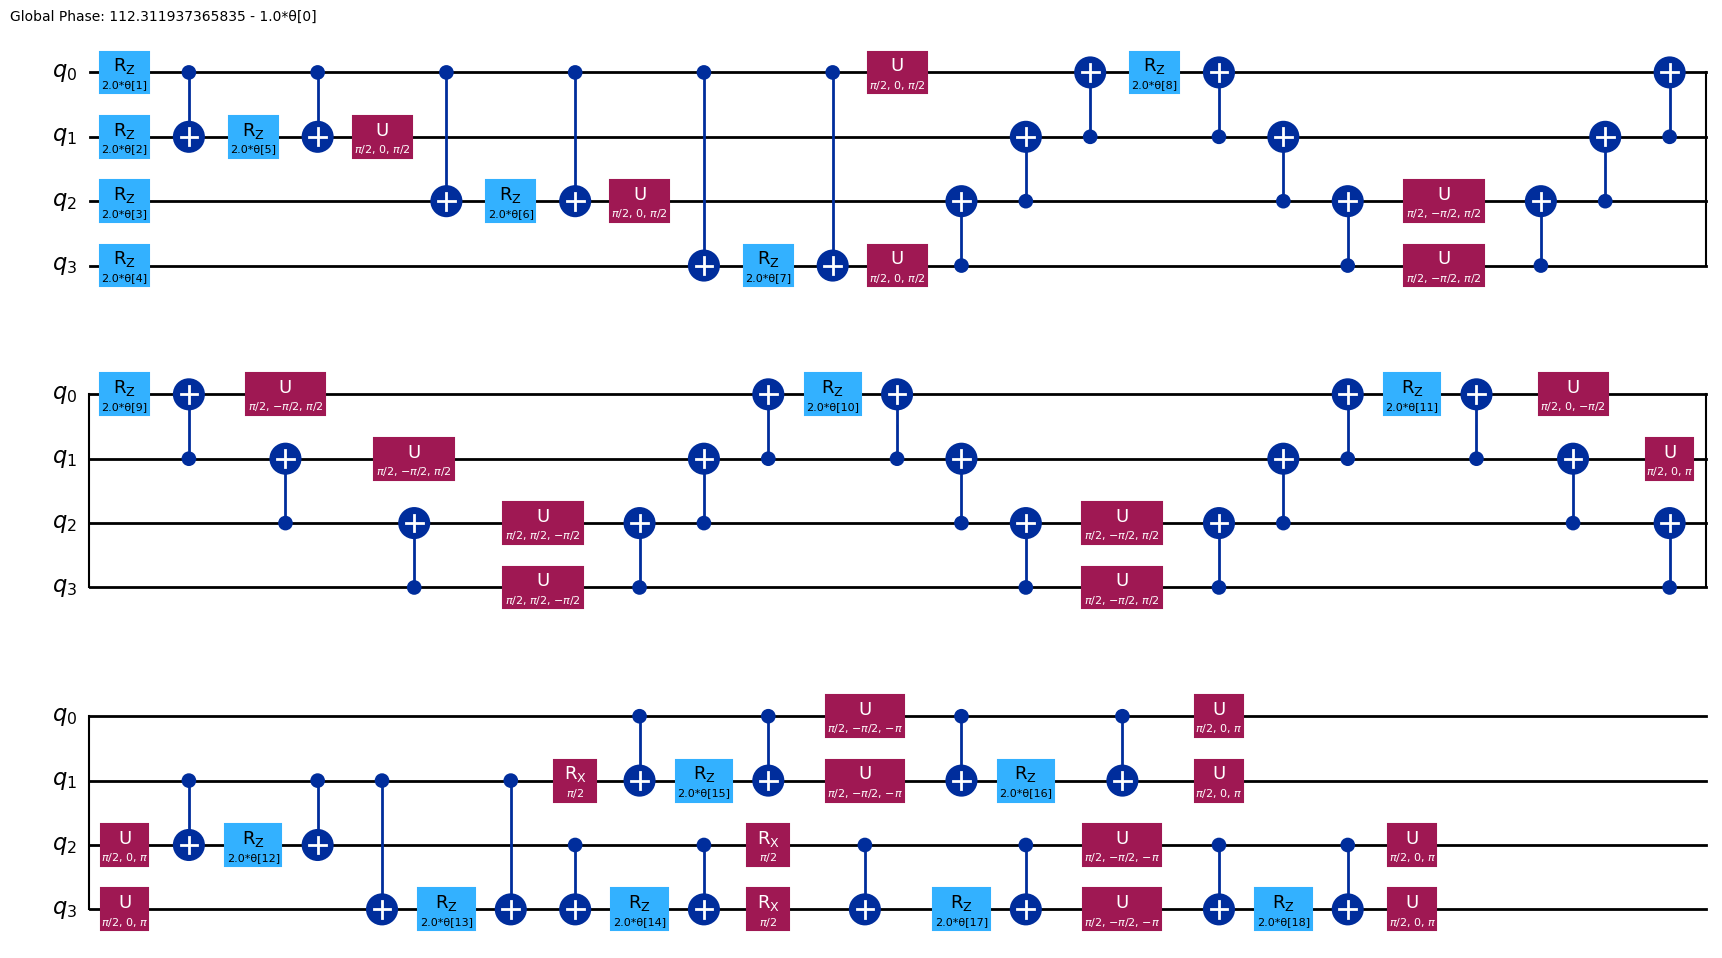

In [17]:
from qiskit.circuit import QuantumCircuit
from qiskit import transpile


# Biên dịch để chỉ dùng cổng U và CNOT
transpiled_qc_simple = transpile(ansatz_u, basis_gates=['u', 'cx', 'rx','ry','rz'])

print("\nMạch sau khi biên dịch :")
transpiled_qc_simple.draw('mpl')

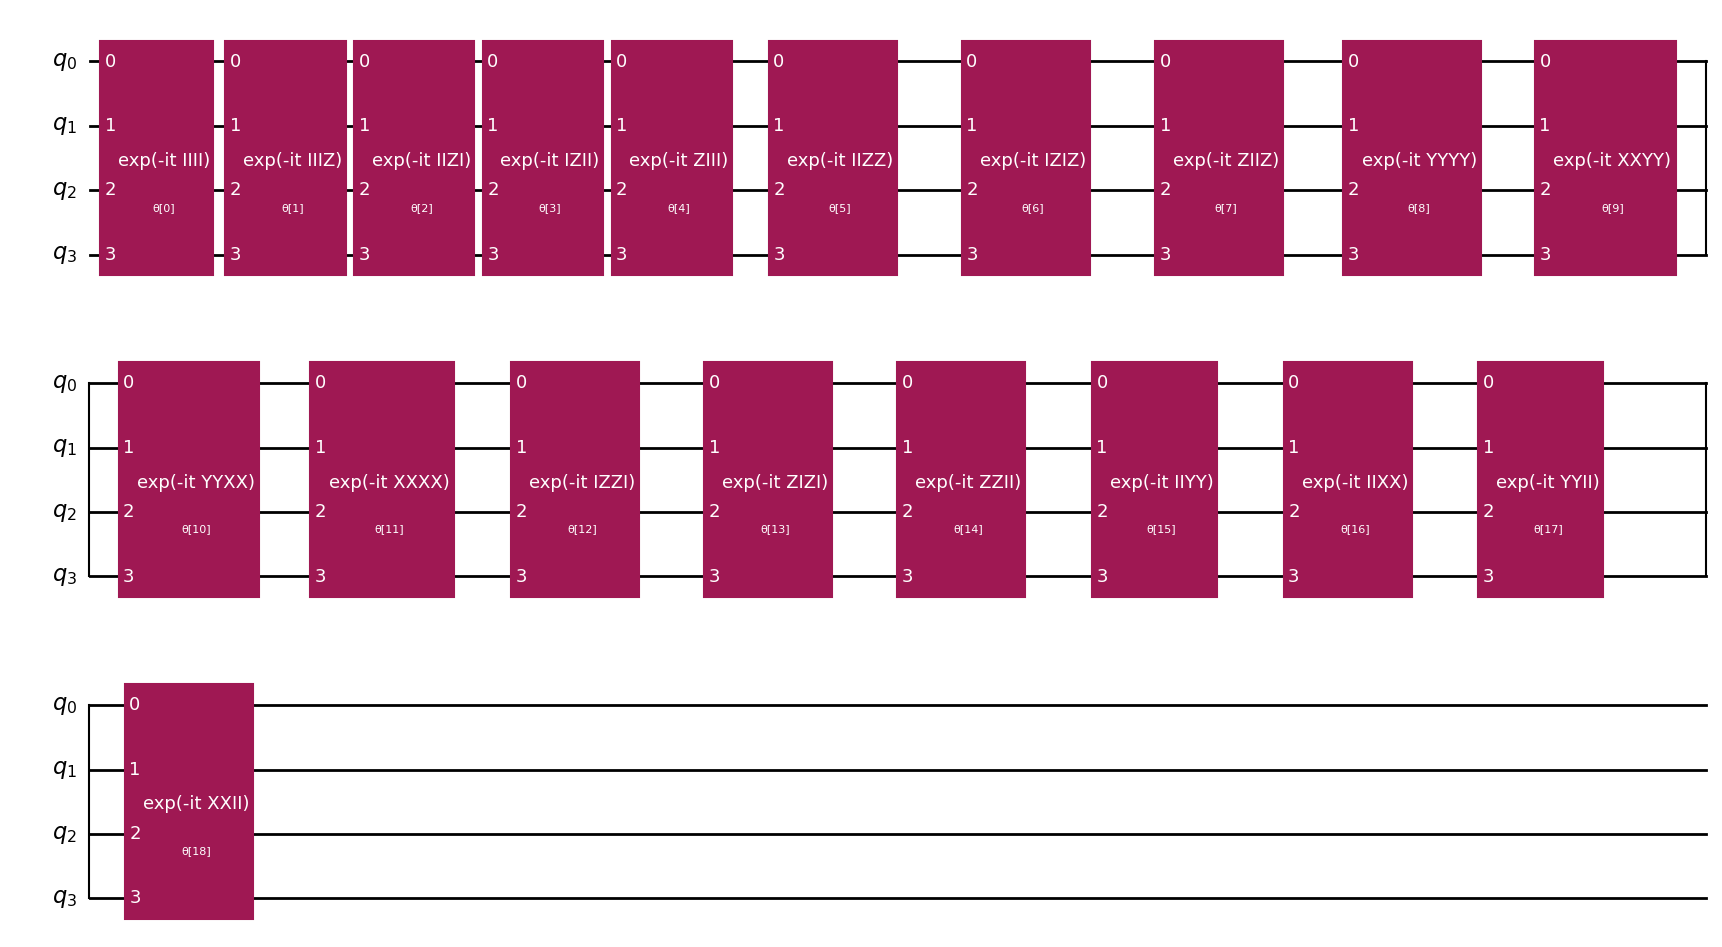

In [59]:
ansatz_u.decompose(reps=0).draw('mpl')

$p_0(\theta) = |\langle \phi(\theta) | \psi \rangle|^2 = 1$

$ C(\theta) = d(\psi, \phi(\theta)) = \sqrt{ 1 - p_0(\theta)}$

In [ ]:
from qoop.compilation.qsp import QuantumStatePreparation
p0s = []
times = np.linspace(0, 10, 4)
for time in times:
    target_unitary_circuit = time_dependent(N, H_time, time) # time_dependent 
    target_s_inverse = target_unitary_circuit.inverse()

    # Tính H_int(time_val) và dùng coeffs của nó làm điểm khởi đầu cho các theta.
    current_H_int = time_dependent_integral(H_time, t=time) 
    initial_point_for_fit = [] # $\vec{\theta_0}$
    label_to_coeff_map_current_t = dict(zip(current_H_int.paulis.to_labels(), current_H_int.coeffs.real)) # $c_k(t) từ H(t)$
    for _ in range(num_ansatz_layers): # Nếu có nhiều lớp, lặp lại bộ giá trị khởi tạo
        for label in combined_unique_labels:
            initial_point_for_fit.append(label_to_coeff_map_current_t.get(label, np.random.rand())) # Lấy coeff hoặc ngẫu nhiên

    qsp = QuantumStatePreparation(
        u=ansatz_u,
        target_state=target_s_inverse
    )
    result_fit = qsp.fit(num_steps=300, 
                         metrics_func=['loss_basic','compilation_trace_fidelities'],
                         initial_point=np.array(initial_point_for_fit) # Cung cấp điểm khởi đầu
                        ) 


    if 'loss_basic' in result_fit.compiler.metrics:
        p0s.append(1 - result_fit.compiler.metrics['loss_basic'][-1])
    else:
        print(f"Không tìm thấy 'loss_basic' cho time {time}. Keys: {result_fit.compiler.metrics.keys()}")
        p0s.append(0)

print('Fidelity (với ansatz có tham số)', p0s)

Fidelity (với ansatz có tham số) [0.9999999999999936, 0.9999999999999936, 0.9999999999999936, 0.9999999999999936]


In [58]:
qsp.u.draw('mpl')

NameError: name 'qsp' is not defined

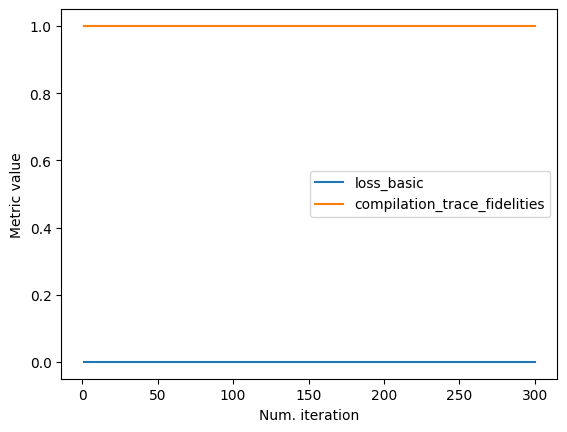

In [ ]:
qsp.plot()

In [ ]:
print(qsp.thetas)

[1.         0.99999999 1.00000002 1.         1.00000003 0.99999997
 0.99999999 1.00000005 1.00000001 0.99999998 0.99999999 0.99999999
 1.         0.99999999 1.00000001 1.         1.         1.
 1.        ]


$\ket{\Psi_0}$

In [12]:
from qiskit.quantum_info import Statevector
circuit = ansatz.assign_parameters(res.optimal_parameters)
psi_0_vqe = np.array(Statevector(circuit).data)
print("Vector trạng thái VQE:", psi_0_vqe)

Vector trạng thái VQE: [-6.12595192e-17+2.05864149e-17j  8.47574432e-17+5.08439190e-18j
  8.99843222e-17-3.35039435e-17j  4.05587302e-17+3.35039435e-17j
  5.04452342e-19+5.59042235e-17j -9.93774801e-01+7.62189534e-18j
  4.85258293e-04-1.01500382e-34j  4.37729298e-17-3.30925893e-17j
 -6.86951676e-17+7.36438431e-17j  1.50123041e-04-2.80021416e-17j
  1.11406403e-01+5.14400249e-17j  2.08235387e-17+1.55676620e-17j
 -1.67510780e-18+1.81168462e-17j -6.59009492e-17+5.55833687e-17j
  2.73415181e-17+9.06956081e-17j -3.04554111e-17-2.36919139e-17j]


In [ ]:
from qiskit.quantum_info import DensityMatrix
U_theta = qsp.u.assign_parameters(qsp.thetas)
U_theta_tt = DensityMatrix(U_theta)
print("Ma trận trạng thái U(theta):", U_theta_tt)

Ma trận trạng thái U(theta): DensityMatrix([[ 1.00000000e+00+1.23259516e-32j,
                 0.00000000e+00+0.00000000e+00j,
                 0.00000000e+00+0.00000000e+00j,
                -1.12103428e-16+6.73488276e-09j,
                 0.00000000e+00+0.00000000e+00j,
                 0.00000000e+00+0.00000000e+00j,
                 0.00000000e+00+0.00000000e+00j,
                 0.00000000e+00+0.00000000e+00j,
                 0.00000000e+00+0.00000000e+00j,
                 0.00000000e+00+0.00000000e+00j,
                 0.00000000e+00+0.00000000e+00j,
                 0.00000000e+00+0.00000000e+00j,
                -2.05502942e-16+3.67393016e-09j,
                 0.00000000e+00+0.00000000e+00j,
                 0.00000000e+00+0.00000000e+00j,
                -2.47434888e-17+3.05132169e-08j],
               [ 0.00000000e+00+0.00000000e+00j,
                 0.00000000e+00+0.00000000e+00j,
                 0.00000000e+00+0.00000000e+00j,
                 0.00000000e+00+0.00000

$ \ket{\Psi(\vec{\theta_t)}} = U(\vec{\theta_t}) \ket{\Psi_0}$

In [ ]:
from qiskit.quantum_info import Operator
U_theta = qsp.u.assign_parameters(qsp.thetas)
U_theta_t_op_matrix = Operator(U_theta).data

psi_0_vqe_col = psi_0_vqe.reshape(-1, 1) 
Psi_theta_t_col = U_theta_t_op_matrix @ psi_0_vqe_col
Psi_theta_t = Psi_theta_t_col.flatten() # Chuyển về mảng 1D 

print("Vector trạng thái xấp xỉ Psi(theta_t) :", Psi_theta_t)

Vector trạng thái xấp xỉ Psi(theta_t) : [ 2.05505238e-17-1.73362249e-17j  7.28680813e-18+8.17529988e-18j
 -2.89904943e-17-3.90820194e-17j -5.65398109e-17-4.76756997e-18j
  5.28732448e-17-7.61812802e-17j -4.42103197e-01+4.89460331e-01j
 -4.71807545e-02+3.30670891e-01j -5.78267643e-18+1.44364294e-16j
  1.59559194e-16+1.63817534e-16j -4.69662078e-02+3.29945609e-01j
 -1.28459300e-01-5.70817278e-01j -1.94669451e-17-8.60336120e-17j
 -6.12790576e-17-3.63148198e-17j -2.28900626e-17-5.81445868e-17j
 -2.64906607e-17+5.99822466e-17j  1.06988382e-17+4.69967450e-17j]


In [13]:
import pennylane as qml
from qiskit.quantum_info import random_unitary
from qiskit.circuit.library import UnitaryGate
from sync import cost as cost_func
from sync import circuit, constant
import pennylane.numpy as np
import pennylane as qml
%load_ext autoreload
%autoreload 2


In [23]:
# Tạo target unitary CỐ ĐỊNH (dưới dạng ma trận NumPy)
from qiskit.quantum_info import Operator
time_pen = 4
target_pen = time_dependent(N, H_time, time_pen)
target_pen_matrix = Operator(target_pen).data # Chuyển thành ma trận NumPy
print("Ma trận của target unitary (Pennylane):\n", target_pen_matrix)

Ma trận của target unitary (Pennylane):
 [[ 1.00000000e+00-8.00141044e-16j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  3.04713825e-01-9.52439721e-01j
   8.70373917e-04-2.70277440e-03j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j 

In [24]:
print(f"Shape của target_fixed_matrix_np: {target_pen_matrix.shape}")
print(f"Dtype của target_fixed_matrix_np: {target_pen_matrix.dtype}")
# print(target_fixed_matrix_np) # In ra một phần để xem cấu trúc

Shape của target_fixed_matrix_np: (16, 16)
Dtype của target_fixed_matrix_np: complex128


In [ ]:
import numpy as np
from pennylane import numpy as np # Giả sử dùng Pennylane

def create_constrained_initial_thetas(num_layers, num_params_per_layer, num_qubits):
    """
    Tạo ra các tham số ban đầu theo chiến lược "ràng buộc" (constrained initialization).
    Tổng các tham số trong mỗi lớp sẽ bằng T = c/N.
    """
    all_thetas = []
    
    # Hằng số c, có thể chọn là pi/2 như trong bài báo
    c = np.pi / 2.0
    
    # Giá trị tổng mục tiêu T cho mỗi lớp
    target_sum_T = c / num_qubits if num_qubits > 0 else 0

    # Lặp qua từng lớp để tạo tham số
    for _ in range(num_layers):
        # 1. Tạo ra các số ngẫu nhiên thô để xác định tỷ lệ
        # num_params_per_layer là số chuỗi Pauli trong 1 lớp
        raw_thetas = np.random.rand(num_params_per_layer)
        
        # 2. Tính tổng của các số ngẫu nhiên thô
        sum_raw_thetas = np.sum(raw_thetas)
        
        # 3. Chuẩn hóa để tổng của chúng bằng đúng target_sum_T
        # Bằng cách nhân mỗi số với tỷ lệ (T / tổng_thô)
        if sum_raw_thetas > 0:
            layer_thetas = raw_thetas * (target_sum_T / sum_raw_thetas)
        else: # Xử lý trường hợp chỉ có 1 tham số hoặc tất cả ngẫu nhiên bằng 0
            layer_thetas = np.full(num_params_per_layer, target_sum_T / num_params_per_layer)

        # Thêm các tham số của lớp này vào danh sách tổng
        all_thetas.extend(layer_thetas)
        
    # Chuyển danh sách Python thành mảng Pennylane NumPy có thể tính đạo hàm
    initial_thetas = np.array(all_thetas, requires_grad=True)
    
    return initial_thetas


num_layers = 6
num_params_per_layer = len(combined_unique_labels)  # Số chuỗi Pauli cố định
num_qubits = H_0.num_qubits  # Số qubit từ Hamiltonian

# Tạo thetas ban đầu hiệu quả
effective_thetas = create_constrained_initial_thetas(
    num_layers, 
    num_params_per_layer, 
    num_qubits
)

print(f"Số tham số được tạo: {len(effective_thetas)}")
print("Một vài tham số đầu tiên:", effective_thetas[:num_params_per_layer])
print(f"Kiểm tra tổng tham số của lớp đầu tiên: {np.sum(effective_thetas[:num_params_per_layer]):.4f}")
print(f"Giá trị T mục tiêu: { (np.pi/2.0)/num_qubits :.4f}")

Số tham số được tạo: 114
Một vài tham số đầu tiên: [0.03160263 0.01271849 0.03278442 0.03150642 0.0026809  0.02379244
 0.0296551  0.0242471  0.01596584 0.00525387 0.0175281  0.02146088
 0.02246991 0.03492792 0.0067834  0.03269271 0.03653313 0.00715149
 0.00294432]
Kiểm tra tổng tham số của lớp đầu tiên: 0.3927
Giá trị T mục tiêu: 0.3927


In [14]:
def pennylane_ansatz_from_qiskit_pauli_evo(thetas, num_qubits, pauli_labels, num_layers):
    """
Tạo một ansatz Pennylane tương đương với việc áp dụng một chuỗi các PauliEvolutionGate của Qiskit.
Cấu trúc của Qiskit ansatz: U(theta) = product_L (product_k exp(-i * theta_Lk * P_k))
Trong Pennylane, qml.exp(op, coeff) thực hiện exp(coeff * op).
Chúng ta muốn thực hiện exp(-i * theta_Lk * P_k), vậy:
    op = P_k (dưới dạng PauliWord của Pennylane)
    coeff = -1j * theta_Lk

Args:
    thetas (np.ndarray): Mảng 1D các tham số theta, được làm phẳng (flattened).
                            Thứ tự phải khớp với cách Qiskit ansatz sử dụng chúng
                            (tức là, tất cả các theta cho lớp 1, sau đó tất cả cho lớp 2, v.v.).
    num_qubits (int): Số qubit của hệ thống.
    pauli_labels (list[str]): Danh sách các chuỗi Pauli CỐ ĐỊNH (P_k)
                                    dưới dạng chuỗi ký tự kiểu Qiskit (ví dụ: "IXYZ", "ZZI").
                                    Độ dài mỗi chuỗi phải bằng num_qubits.
    num_layers (int): Số lớp (N_L) của ansatz.
"""
    if not pauli_labels:
        raise ValueError("pauli_labels không được rỗng.")

    num_params_per_layer = len(pauli_labels)
    num_params_expected = num_params_per_layer * num_layers

    if len(thetas) != num_params_expected:
        raise ValueError(f"Số lượng tham số `thetas` không khớp. Mong đợi {num_params_expected}, nhận được {len(thetas)}.")
    
    param_idx = 0
    for _ in range(num_layers):
        for pauli_qiskit_str in pauli_labels:
            if len(pauli_qiskit_str) != num_qubits:
                raise ValueError(f"Chuỗi Pauli '{pauli_qiskit_str}' không khớp num_qubits.")
            
            pennylane_observable = None
            if all(c == 'I' for c in pauli_qiskit_str):
                if num_qubits > 0:
                    pennylane_observable = qml.Identity(0)
                    for i_w in range(1, num_qubits): pennylane_observable @= qml.Identity(i_w)
                elif num_qubits == 0: pennylane_observable = qml.Identity(0)
                else: raise ValueError("Số qubit phải không âm.")
            else:
                try: pennylane_observable = qml.pauli.string_to_pauli_word(pauli_qiskit_str)
                except AttributeError:

                    ops_list = []
                    for i_wire in range(num_qubits):
                        char = pauli_qiskit_str[i_wire]
                        if char == 'X': ops_list.append(qml.PauliX(i_wire))
                        elif char == 'Y': ops_list.append(qml.PauliY(i_wire))
                        elif char == 'Z': ops_list.append(qml.PauliZ(i_wire))
                        elif char == 'I': pass
                        else: raise ValueError(f"Ký tự Pauli không hợp lệ '{char}'")

                    if not ops_list and num_qubits > 0:
                         pennylane_observable = qml.Identity(0)
                         for i_w in range(1, num_qubits): pennylane_observable @= qml.Identity(i_w)
                    elif ops_list: pennylane_observable = qml.prod(*ops_list)
                    else: raise ValueError(f"Không tạo được observable từ '{pauli_qiskit_str}'")
            if pennylane_observable is not None: qml.exp(pennylane_observable, -1j * thetas[param_idx])
            param_idx += 1
# --- Kết thúc hàm ansatz ---

In [25]:
# --- Hàm ansatz Pennylane ---
import math
from qiskit.quantum_info import Operator
import pennylane as qml
from numpy.random import Generator, PCG64
#from pennylane import numpy as pnp 
import numpy as np
import pennylane.numpy as pnp
import matplotlib.pyplot as plt
from qiskit.quantum_info import random_unitary

num_qubits = H_0.num_qubits #num_qubits
num_layers = 6 #num_ansatz_layers
#constant_error = 1e-6 

def pennylane_ansatz_from_qiskit_pauli_evo(thetas, num_qubits, pauli_labels, num_layers):
    """
Tạo một ansatz Pennylane tương đương với việc áp dụng một chuỗi các PauliEvolutionGate của Qiskit.
Cấu trúc của Qiskit ansatz: U(theta) = product_L (product_k exp(-i * theta_Lk * P_k))
Trong Pennylane, qml.exp(op, coeff) thực hiện exp(coeff * op).
Chúng ta muốn thực hiện exp(-i * theta_Lk * P_k), vậy:
    op = P_k (dưới dạng PauliWord của Pennylane)
    coeff = -1j * theta_Lk

Args:
    thetas (np.ndarray): Mảng 1D các tham số theta, được làm phẳng (flattened).
                            Thứ tự phải khớp với cách Qiskit ansatz sử dụng chúng
                            (tức là, tất cả các theta cho lớp 1, sau đó tất cả cho lớp 2, v.v.).
    num_qubits (int): Số qubit của hệ thống.
    pauli_labels (list[str]): Danh sách các chuỗi Pauli CỐ ĐỊNH (P_k)
                                    dưới dạng chuỗi ký tự kiểu Qiskit (ví dụ: "IXYZ", "ZZI").
                                    Độ dài mỗi chuỗi phải bằng num_qubits.
    num_layers (int): Số lớp (N_L) của ansatz.
"""
    if not pauli_labels:
        raise ValueError("pauli_labels không được rỗng.")

    num_params_per_layer = len(pauli_labels)
    num_params_expected = num_params_per_layer * num_layers

    if len(thetas) != num_params_expected:
        raise ValueError(f"Số lượng tham số `thetas` không khớp. Mong đợi {num_params_expected}, nhận được {len(thetas)}.")
    
    param_idx = 0
    for _ in range(num_layers):
        for pauli_qiskit_str in pauli_labels:
            if len(pauli_qiskit_str) != num_qubits:
                raise ValueError(f"Chuỗi Pauli '{pauli_qiskit_str}' không khớp num_qubits.")
            
            pennylane_observable = None
            if all(c == 'I' for c in pauli_qiskit_str):
                if num_qubits > 0:
                    pennylane_observable = qml.Identity(0)
                    for i_w in range(1, num_qubits): pennylane_observable @= qml.Identity(i_w)
                elif num_qubits == 0: pennylane_observable = qml.Identity(0)
                else: raise ValueError("Số qubit phải không âm.")
            else:
                try: pennylane_observable = qml.pauli.string_to_pauli_word(pauli_qiskit_str)
                except AttributeError:

                    ops_list = []
                    for i_wire in range(num_qubits):
                        char = pauli_qiskit_str[i_wire]
                        if char == 'X': ops_list.append(qml.PauliX(i_wire))
                        elif char == 'Y': ops_list.append(qml.PauliY(i_wire))
                        elif char == 'Z': ops_list.append(qml.PauliZ(i_wire))
                        elif char == 'I': pass
                        else: raise ValueError(f"Ký tự Pauli không hợp lệ '{char}'")

                    if not ops_list and num_qubits > 0:
                         pennylane_observable = qml.Identity(0)
                         for i_w in range(1, num_qubits): pennylane_observable @= qml.Identity(i_w)
                    elif ops_list: pennylane_observable = qml.prod(*ops_list)
                    else: raise ValueError(f"Không tạo được observable từ '{pauli_qiskit_str}'")
            if pennylane_observable is not None: qml.exp(pennylane_observable, -1j * thetas[param_idx])
            param_idx += 1
# --- Kết thúc hàm ansatz ---

pauli_labels = combined_unique_labels
num_thetas = len(pauli_labels) * num_layers
# num_blocks = num_qubits*(num_qubits-1)//2
# active_blocks =  np.ones(num_blocks * num_layers)
# thetas ban đầu
# if num_thetas > 0:
#     thetas = pnp.array(np.random.uniform(0, 2*np.pi, num_thetas), requires_grad=True)
# else:
#     thetas = pnp.array([], requires_grad=False)
rng = Generator(PCG64())  
#args = parser.parse_args()
#thetas = np.random.uniform(0, 2*np.pi, constant.num_params_on_active_blocks(active_blocks), requires_grad=True)
#thetas = np.random.uniform(0,2*np.pi,num_thetas,requires_grad=True)

# Phương pháp random 
thetas = pnp.array(2*math.pi*rng.random(size = num_thetas), requires_grad=True)

# Phương pháp small random
# thetas = pnp.array(args.small*rng.random(size = num_thetas), requires_grad=True)

#Phương pháp constrained initialization
times = np.linspace(0, 2, 10)

# Danh sách lưu trữ
all_optimized_U_theta_t = {}
all_psi_t_pennylane = {}
#all_costs_history_per_t = {}



print("Bắt đầu mô phỏng tiến hóa thời gian bằng Pennylane...")
for t in times:
    print(f"\n--- Thời điểm t = {t:.4f} ---")

    # 1. Tạo target_unitary (Qiskit circuit) tại t
    target = time_dependent(num_qubits, H_time, t)

    # current_target_matrix_np = None
    # if num_qubits > 0:
    #     try:
    #         current_target_matrix_np = Operator(target).data
    #         print(f"  Đã tạo target U_true(t={t:.4f}) shape: {current_target_matrix_np.shape}")
    #     except Exception as e:
    #         print(f"  Lỗi khi tạo target matrix cho t={t:.4f}: {e}")
    #         continue
    # elif num_qubits == 0:
    #     current_target_matrix_np = np.array([[1.0+0.j]])
    #     print(f"  Đã tạo target U_true(t={t:.4f}) cho 0 qubit.")
    # else:
    #     print(f"  Số qubit không hợp lệ: {num_qubits}")
    #     continue

    # 2. Hàm cost cho Pennylane, sử dụng target của t hiện tại
    #    Hàm này được định nghĩa lại bên trong vòng lặp để nó "capture" current_target_matrix_np
    def cost(thetas): 
        # if num_thetas == 0:
        #     ansatz_matrix_no_params = np.eye(2**num_qubits if num_qubits > 0 else 1, dtype=complex)
        #     return cost_func.c_hst(ansatz_matrix_no_params, current_target_matrix_np)

        ansatz_matrix = qml.matrix(pennylane_ansatz_from_qiskit_pauli_evo,
                                   wire_order=list(range(num_qubits)) #if num_qubits > 0 else [0]
                                  )(
                                      thetas,
                                      num_qubits,
                                      pauli_labels,
                                      num_layers
                                  )
        return cost_func.c_hst(ansatz_matrix, target)
    # 3. Tối ưu hóa thetas cho t hiện tại
    #    Sử dụng thetas (đã được tối ưu từ bước trước) làm điểm khởi đầu
    #    Tạo bản sao để tối ưu hóa cục bộ, sau đó cập nhật lại thetas

    # if num_thetas > 0:
    #     # a.thetas đầu vào cho vòng lặp tối ưu này là thetas
    #     # Trình tối ưu hóa sẽ cập nhật trực tiếp thetas
    #     print(f"  Bắt đầu tối ưu hóa cho t={t:.4f} với initial thetas: {thetas.numpy() if hasattr(thetas, 'numpy') else thetas[:min(3, len(thetas))]}...")

    steps = 300
    costs = []
    opt = qml.AdamOptimizer(stepsize=0.01)
    
    for n in range(steps):
        thetas, prev_cost = opt.step_and_cost(cost, thetas)
        # costs.append(prev_cost.numpy() if hasattr(prev_cost, 'numpy') else prev_cost)
        if (n + 1) % (steps // 2 if steps >=2 else 1) == 0: 
            print(f"    t={t:.2f}, Opt. step {n+1}/{steps}, Cost: {prev_cost:.6f}")
        if prev_cost < constant.error:
                print(f"    Đạt ngưỡng lỗi ở bước {n+1} cho t={t:.2f}")
               # break
        costs.append(prev_cost)

    # all_costs_history_per_t[t] = costs
    # optimized_thetas_val_this_t = thetas_evolving_pennylane.numpy() if hasattr(thetas_evolving_pennylane, 'numpy') else thetas_evolving_pennylane
    # print(f"  Optimal thetas cho t={t:.4f}: {optimized_thetas_val_this_t[:min(3, len(optimized_thetas_val_this_t))]}...")
    # if costs: print(f"  Cost cuối cùng cho t={t:.4f}: {costs[-1]:.6f}")

    # 4. Lấy ma trận U(theta_t*) đã tối ưu và lưu lại
    U_theta_t = None
    if num_thetas > 0:
        U_theta_t = qml.matrix(pennylane_ansatz_from_qiskit_pauli_evo,
                                            wire_order=range(num_qubits) #if num_qubits > 0 else [0]
                                           )(
                                               thetas, 
                                               num_qubits,
                                               pauli_labels,
                                               num_layers
                                           )
    elif num_qubits > 0:
        U_theta_t = np.eye(2**num_qubits, dtype=complex)
    else:
        U_theta_t = np.array([[1.0+0.j]])


    all_optimized_U_theta_t[t] = U_theta_t #.numpy() if hasattr(U_theta_t, 'numpy') else np.asarray(U_theta_t)

    # 5. Tính |Psi(t)> xấp xỉ = U(theta_t*) |Psi_0> (psi_0_vqe)
    if num_qubits >= 0 : 
        psi_0_col = psi_0_vqe.reshape(-1, 1)
        U_mat_np_for_psi = all_optimized_U_theta_t[t]  # Ma trận U(theta_t*) đã tối ưu          

        psi_t_col_approx = U_mat_np_for_psi @ psi_0_col
        psi_t_approx = psi_t_col_approx.flatten()
        all_psi_t_pennylane[t] = psi_t_approx

print("\nHoàn thành mô phỏng tiến hóa thời gian.")

Bắt đầu mô phỏng tiến hóa thời gian bằng Pennylane...

--- Thời điểm t = 0.0000 ---
    Đạt ngưỡng lỗi ở bước 88 cho t=0.00
    Đạt ngưỡng lỗi ở bước 89 cho t=0.00
    Đạt ngưỡng lỗi ở bước 90 cho t=0.00
    Đạt ngưỡng lỗi ở bước 91 cho t=0.00
    Đạt ngưỡng lỗi ở bước 92 cho t=0.00
    Đạt ngưỡng lỗi ở bước 93 cho t=0.00
    Đạt ngưỡng lỗi ở bước 94 cho t=0.00
    Đạt ngưỡng lỗi ở bước 95 cho t=0.00
    Đạt ngưỡng lỗi ở bước 96 cho t=0.00
    Đạt ngưỡng lỗi ở bước 97 cho t=0.00
    Đạt ngưỡng lỗi ở bước 98 cho t=0.00
    Đạt ngưỡng lỗi ở bước 99 cho t=0.00
    Đạt ngưỡng lỗi ở bước 100 cho t=0.00
    Đạt ngưỡng lỗi ở bước 101 cho t=0.00
    Đạt ngưỡng lỗi ở bước 102 cho t=0.00
    Đạt ngưỡng lỗi ở bước 103 cho t=0.00
    Đạt ngưỡng lỗi ở bước 104 cho t=0.00
    Đạt ngưỡng lỗi ở bước 105 cho t=0.00
    Đạt ngưỡng lỗi ở bước 106 cho t=0.00
    Đạt ngưỡng lỗi ở bước 107 cho t=0.00
    Đạt ngưỡng lỗi ở bước 108 cho t=0.00
    Đạt ngưỡng lỗi ở bước 109 cho t=0.00
    Đạt ngưỡng lỗi ở bước 

In [ ]:
print(num_blocks)

6


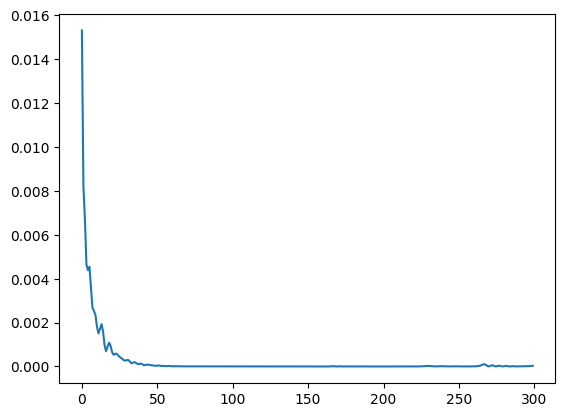

In [26]:
import matplotlib.pyplot as plt
plt.plot(costs)

In [ ]:
costs[-1]

tensor(1.79026002e-05, requires_grad=True)

In [ ]:
from qoop.compilation.qsp import QuantumStatePreparation
p0s = [] 
all_psi_t_approximated = {} 

times_for_qsp = np.linspace(0, 10, 4) 

for t_current in times_for_qsp: 

    target_unitary_at_t_circuit = time_dependent(num_qubits, H_time, t_current)
    target_state_inverse_at_t = target_unitary_at_t_circuit.inverse()

    current_H_int = time_dependent_integral(H_time, t=t_current) 
    initial_point_for_this_t = [] # $\vec{\theta_0}$
    label_to_coeff_map_current_t = dict(zip(current_H_int.paulis.to_labels(), current_H_int.coeffs.real)) # $c_k(t) từ H(t)$
    for _ in range(num_ansatz_layers): # Nếu có nhiều lớp, lặp lại bộ giá trị khởi tạo
        for label in combined_unique_labels:
            initial_point_for_this_t.append(label_to_coeff_map_current_t.get(label, np.random.rand())) # Lấy coeff hoặc ngẫu nhiên 

    qsp_instance = QuantumStatePreparation(
        u=ansatz_u.copy(), # Dùng copy để ansatz_u không bị thay đổi tham số giữa các lần lặp
        target_state=target_state_inverse_at_t
    )
    fit_result = qsp_instance.fit(
        num_steps=300, 
        metrics_func=['loss_basic'],
        initial_point=np.array(initial_point_for_this_t) 
    )
    
    optimal_thetas_at_t_current = qsp_instance.thetas
    # print(f"t = {t_current}, optimal_thetas = {optimal_thetas_at_t_current}")
    
    U_theta_t_current_optimized = ansatz_u.assign_parameters(optimal_thetas_at_t_current)
    # print(U_theta_t_current_matrix)'
    
    U_theta_t_current_matrix = Operator(U_theta_t_current_optimized).data
    psi_0_vqe_col = psi_0_vqe.reshape(-1, 1)
    psi_t_current_col_approx = U_theta_t_current_matrix @ psi_0_vqe_col
    psi_t_current_approx = psi_t_current_col_approx.flatten()
    
    all_psi_t_approximated[t_current] = psi_t_current_approx 

    if 'loss_basic' in fit_result.compiler.metrics:
            p0s.append(1 - fit_result.compiler.metrics['loss_basic'][-1])
    else:
            print(f"Không tìm thấy 'loss_basic' cho time {time}. Keys: {fit_result.compiler.metrics.keys()}")
            p0s.append(0)

print('Fidelity (với ansatz có tham số)', p0s)

Fidelity (với ansatz có tham số) [0.9999999999999936, 0.9999999999999938, 0.9999999999999937, 0.9999999999999931]


In [ ]:
print(qsp_instance.fidelity)

0.99999999999999977796


In [ ]:

t_target_print = times_for_qsp[2] 
                                 
print(f"\n--- In vector trạng thái Psi(t) tại t = {t_target_print:.4f} ---")

if t_target_print in all_psi_t_approximated:
    psi_at_t_target = all_psi_t_approximated[t_target_print]
    if psi_at_t_target is not None:
        print("Vector trạng thái Psi(t) xấp xỉ:")
        print(psi_at_t_target)
        print(f"Chuẩn của Psi(t={t_target_print:.4f}): {np.linalg.norm(psi_at_t_target)}")
    else:
        print(f"Không có dữ liệu Psi(t) hợp lệ cho t = {t_target_print:.4f} (do loss cao hoặc lỗi).")
else:
    # Nếu t_target_print không chính xác là một key, tìm key gần nhất
    closest_t = min(all_psi_t_approximated.keys(), key=lambda k: abs(k - t_target_print) if all_psi_t_approximated[k] is not None else float('inf'))
    if all_psi_t_approximated.get(closest_t) is not None and abs(closest_t - t_target_print) < (times_for_qsp[1]-times_for_qsp[0])/2 : # Ngưỡng để coi là "gần"
        print(f"Không tìm thấy chính xác t = {t_target_print:.4f}. Hiển thị cho thời điểm gần nhất t = {closest_t:.4f}:")
        psi_at_closest_t = all_psi_t_approximated[closest_t]
        print(psi_at_closest_t)
        print(f"Chuẩn của Psi(t={closest_t:.4f}): {np.linalg.norm(psi_at_closest_t)}")
    else:
        print(f"Không tìm thấy dữ liệu Psi(t) cho t = {t_target_print:.4f} hoặc các điểm lân cận.")


--- In vector trạng thái Psi(t) tại t = 6.6667 ---
Vector trạng thái Psi(t) xấp xỉ:
[-3.09693040e-17+1.97634133e-17j -4.24416855e-17-7.62661562e-17j
  4.42628361e-17-2.30785989e-17j -1.14383800e-17+1.85101801e-17j
 -2.69298938e-17+1.39377582e-16j  4.42260619e-01-4.89251122e-01j
  4.72422863e-02-3.30749951e-01j -5.47207680e-17-8.04326090e-17j
  2.88123342e-18-2.79980337e-18j  4.71275221e-02-3.30361986e-01j
  1.28772774e-01+5.70498947e-01j  7.01158483e-17-2.97172225e-17j
 -1.97260819e-17-5.53050595e-17j  1.26697995e-16-4.44062649e-18j
 -8.93583655e-17+1.15068821e-16j -4.03878123e-17-9.73761987e-17j]
Chuẩn của Psi(t=6.6667): 0.99999999999999


In [25]:
from qiskit.quantum_info import Operator
all_psi_t_exact = {} 

times = np.linspace(0,100,201)

for t in times:

    U_true_at_t_circuit = time_dependent(num_qubits, H_time, t)
    U_true_at_t_matrix = Operator(U_true_at_t_circuit).data
    
    psi_0_vqe_col = psi_0_vqe.reshape(-1,1)
    psi_t_current_col_exact = U_true_at_t_matrix @ psi_0_vqe_col
    psi_t_current_exact = psi_t_current_col_exact.flatten()
    
    all_psi_t_exact[t] = psi_t_current_exact

In [29]:
# Magnus 2
import numpy as np
from scipy.linalg import expm 
from qiskit.quantum_info import Operator, Statevector 
import time

H_static_mat = H_0.to_matrix(sparse=False)

D_mat = z_dipole_matrix     
DIM = 2**num_qubits
#print(f"Số qubit: {num_qubits}, Kích thước ma trận: {DIM}x{DIM}")

# Tham số mô phỏng
Gamma = 0.25
E0 = 0.01
times = np.linspace(0, 1000, 100) 
M = 100  # Số điểm tích phân cho mỗi bước Magnus

# Hàm Lorentzian
def f_lorentzian(t, E0, Gamma): 
    return (E0 / np.pi) * Gamma / (Gamma**2 + t**2)

# Tích phân phân tích cho f(t)
def f_integral(t_start, t_end, E0, Gamma):
    return (E0/ np.pi) * (np.arctan(t_end / Gamma) - np.arctan(t_start / Gamma))

# Trọng số trapezoidal
def trapezoidal_weights(n_points):
    if n_points <=1: return np.array([1.0]) if n_points == 1 else np.array([])
    weights_val = np.ones(n_points)
    weights_val[0] = weights_val[-1] = 0.5
    return weights_val * (1.0 / (n_points - 1))

# Tính [H0, D]
print("Tính toán trước [H0, D]...")
Comm_H0_D = H_static_mat @ D_mat - D_mat @ H_static_mat

# Tính U(t_j, t_j + h) bằng Magnus bậc 2
def compute_U_step_magnus2(t_j_start, h_step): 
    if h_step == 0:
        return np.eye(DIM, dtype=complex)
    
    # Omega1
    Omega1 = -1j * (H_static_mat * h_step + D_mat * f_integral(t_j_start, t_j_start + h_step, E0, Gamma))
    
    # Omega2
    t_points_inner = np.linspace(t_j_start, t_j_start + h_step, M)
    delta_t_inner = h_step / (M - 1) if M > 1 else h_step
    weights_inner = trapezoidal_weights(M) * delta_t_inner
    f_values_inner = np.array([f_lorentzian(t_val, E0, Gamma) for t_val in t_points_inner])
    
    Omega2 = np.zeros((DIM, DIM), dtype=complex)
    if M > 1:
        for p in range(M): # t1
            t1 = t_points_inner[p]
            f_t1 = f_values_inner[p]
            
            # Tính tích phân bên trong: integral_{t_j_start}^{t1} (f(t2) - f_t1) dt2
            # = (F(t1) - F(t_j_start)) - f_t1 * (t1 - t_j_start)
            integral_f_t2_up_to_t1 = f_integral(t_j_start, t1, E0, Gamma)
            term_for_outer_integral = integral_f_t2_up_to_t1 - (f_t1 * (t1 - t_j_start))
            
            Omega2 += term_for_outer_integral * Comm_H0_D * weights_inner[p]
            
    Omega2 *= -0.5
    
    Omega = Omega1 + Omega2
    U_step = expm(Omega)
    return U_step

# Tính U(t_k, t_0) và Psi(t_k)
print("\nBắt đầu tính U(t_k, t_0) và Psi(t_k) bằng Magnus bậc 2...")
start_run_time = time.time()

# target_unitaries[k] sẽ lưu U(time_points_simulation[k], t_0)
target_unitaries_map = {times[0]: np.eye(DIM, dtype=complex)}

# all_psi_t_magnus[k] sẽ lưu Psi(time_points_simulation[k])
all_psi_t_magnus_map = {times[0]: Statevector(psi_0_vqe)}


# Vòng lặp tính toán U(t_{j+1}, t_0) và Psi(t_{j+1})
# Psi(t_0) đã được lưu
#print(f"Thời điểm t = {time_points_simulation[0]:.4f}")
#print(f"  Psi(t) (một phần): {all_psi_t_magnus_map[time_points_simulation[0]].data[:min(4,DIM)]}...")

for j in range(len(times) - 1):
    t_current_interval_start = times[j]
    t_current_interval_end = times[j+1]
    DT_step = t_current_interval_end - t_current_interval_start
    
    # Tính U(t_{j+1}, t_j)
    U_one_step = compute_U_step_magnus2(t_current_interval_start, DT_step)
    
    # Tính U(t_{j+1}, t_0) = U(t_{j+1}, t_j) @ U(t_j, t_0)
    U_total_up_to_tj_plus_1 = U_one_step @ target_unitaries_map[t_current_interval_start]
    target_unitaries_map[t_current_interval_end] = U_total_up_to_tj_plus_1
    
    # Tính Psi(t_{j+1}) = U(t_{j+1}, t_0) @ Psi(t_0)
    # Hoặc Psi(t_{j+1}) = U(t_{j+1}, t_j) @ Psi(t_j)
    # Cách thứ hai thường tốt hơn về số học nếu Psi(t_j) đã được tính
    current_psi_evolved = all_psi_t_magnus_map[t_current_interval_start].evolve(Operator(U_one_step))
    all_psi_t_magnus_map[t_current_interval_end] = current_psi_evolved

    #print(f"Thời điểm t = {t_current_interval_end:.4f}")
    #print(f"  Psi(t) (một phần): {current_psi_evolved.data[:min(4,DIM)]}...")


end_run_time = time.time()
print(f"\nTổng thời gian tính toán: {end_run_time - start_run_time:.2f} giây")

# Bây giờ all_psi_t_magnus_map chứa các Statevector Psi(t) tại các thời điểm trong time_points_simulation
# Ví dụ, để lấy vector trạng thái dạng NumPy array tại một thời điểm cụ thể:
# t_check = time_points_simulation[3] # Ví dụ
# psi_at_t_check_magnus_sv = all_psi_t_magnus_map.get(t_check)
# if psi_at_t_check_magnus_sv:
#     psi_at_t_check_magnus_array = psi_at_t_check_magnus_sv.data
#     print(f"\nPsi(t={t_check}) dạng array:\n{psi_at_t_check_magnus_array}")

# Bạn có thể sử dụng all_psi_t_magnus_map để vẽ đồ thị dipole moment
# bằng cách thay thế all_psi_t_pennylane bằng all_psi_t_magnus_map trong code vẽ đồ thị
# và đảm bảo hàm calculate_expectation_value nhận Statevector của Qiskit

Tính toán trước [H0, D]...

Bắt đầu tính U(t_k, t_0) và Psi(t_k) bằng Magnus bậc 2...

Tổng thời gian tính toán: 0.07 giây


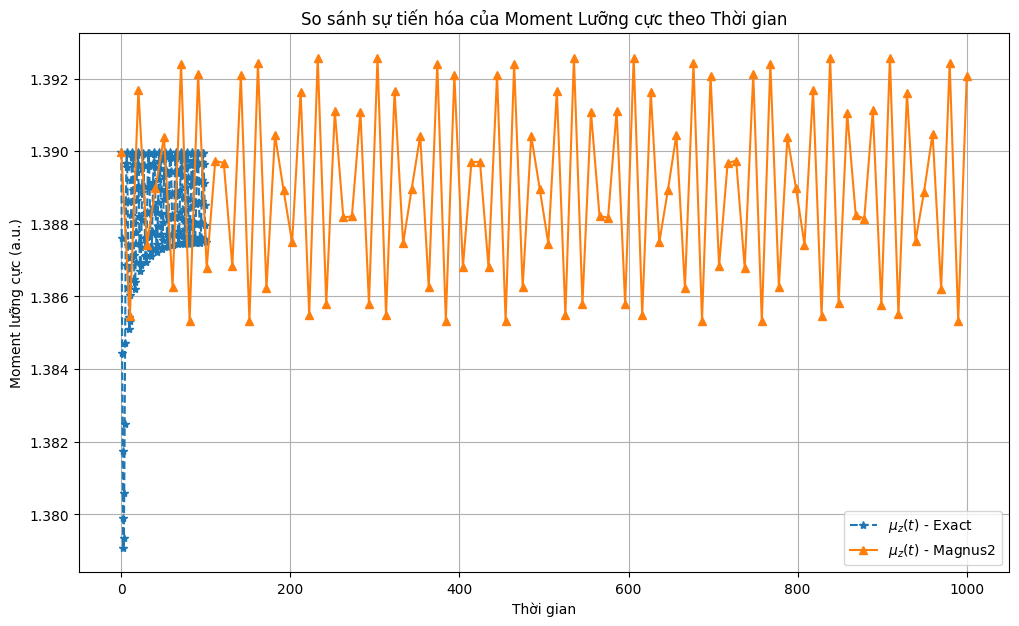

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp 
import qiskit 

def calculate_expectation_value(state_vector_flat, pauli_op_sparse):
    if pauli_op_sparse is None or state_vector_flat is None:
        return np.nan
    sv = Statevector(state_vector_flat)
    try:
        exp_val = sv.expectation_value(pauli_op_sparse)
        return exp_val.real 
    except Exception as e_exp:
        print(f"    Lỗi khi tính giá trị kỳ vọng: {e_exp}")
        return np.nan


psi_0_vqe_col = psi_0_vqe.reshape(-1, 1)

times_plot_magnus2 = []
mux_plot_magnus2 = []
muy_plot_magnus2 = []
muz_plot_magnus2 = []


times_plot_exact = []
mux_plot_exact = []
muy_plot_exact = []
muz_plot_exact = []

times_plot_pennylane = []
mux_plot_pennylane = []
muy_plot_pennylane = []
muz_plot_pennylane = []

# Magnus2 

sorted_times_magnus = sorted(all_psi_t_magnus_map.keys())
for t_current in sorted_times_magnus:       
    psi_t_magnus_current = all_psi_t_magnus_map[t_current]
    
    if psi_t_magnus_current is not None:
        # print(f"  Tính toán cho t = {t_current:.4f} (Magnus2)") # Bỏ comment nếu cần debug
        times_plot_magnus2.append(t_current)
        mux_plot_magnus2.append(calculate_expectation_value(psi_t_magnus_current, dipole_qubit_X if 'dipole_qubit_X' in locals() and dipole_qubit_X is not None else None))
        muy_plot_magnus2.append(calculate_expectation_value(psi_t_magnus_current, dipole_qubit_Y if 'dipole_qubit_Y' in locals() and dipole_qubit_Y is not None else None))
        muz_plot_magnus2.append(calculate_expectation_value(psi_t_magnus_current, z_dipole_qubit))
    else:
        times_plot_magnus2.append(t_current)
        mux_plot_magnus2.append(np.nan)
        muy_plot_magnus2.append(np.nan)
        muz_plot_magnus2.append(np.nan)

times_plot_np_magnus2 = np.array(times_plot_magnus2)
mux_plot_np_magnus2 = np.array(mux_plot_magnus2)
muy_plot_np_magnus2 = np.array(muy_plot_magnus2)
muz_plot_np_magnus2 = np.array(muz_plot_magnus2)

# Pennylane
# sorted_times_pennylane = sorted(all_psi_t_pennylane.keys())

# for t_current in sorted_times_pennylane:
#     psi_t_pennylane_current = all_psi_t_pennylane[t_current]
    
#     if psi_t_pennylane_current is not None:
#         # print(f"  Tính toán cho t = {t_current:.4f} (Pennylane)") # Bỏ comment nếu cần debug
#         times_plot_pennylane.append(t_current)
#         mux_plot_pennylane.append(calculate_expectation_value(psi_t_pennylane_current, dipole_qubit_X if 'dipole_qubit_X' in locals() and dipole_qubit_X is not None else None))
#         muy_plot_pennylane.append(calculate_expectation_value(psi_t_pennylane_current, dipole_qubit_Y if 'dipole_qubit_Y' in locals() and dipole_qubit_Y is not None else None))
#         muz_plot_pennylane.append(calculate_expectation_value(psi_t_pennylane_current, dipole_qubit))
#     else:
#         times_plot_pennylane.append(t_current)
#         mux_plot_pennylane.append(np.nan)
#         muy_plot_pennylane.append(np.nan)
#         muz_plot_pennylane.append(np.nan)

# times_plot_np_pennylane = np.array(times_plot_pennylane)
# mux_plot_np_pennylane = np.array(mux_plot_pennylane)
# muy_plot_np_pennylane = np.array(muy_plot_pennylane)
muz_plot_np_pennylane = np.array(muz_plot_pennylane)

# Exact
sorted_times = sorted(all_psi_t_exact.keys())

for t_current in sorted_times:
    psi_t = all_psi_t_exact[t_current]
    
    if psi_t is not None: 
        times_plot_exact.append(t_current)
        

        current_mux = calculate_expectation_value(psi_t, dipole_qubit_X if 'dipole_qubit_X' in locals() and dipole_qubit_X is not None else None)
        current_muy = calculate_expectation_value(psi_t, dipole_qubit_Y if 'dipole_qubit_Y' in locals() and dipole_qubit_Y is not None else None)
        current_muz = calculate_expectation_value(psi_t, z_dipole_qubit) # Giả định dipole_qubit_Z luôn có

        mux_plot_exact.append(current_mux)
        muy_plot_exact.append(current_muy)
        muz_plot_exact.append(current_muz)
    else:

        times_plot_exact.append(t_current)
        mux_plot_exact.append(np.nan)
        muy_plot_exact.append(np.nan)
        muz_plot_exact.append(np.nan)

times_plot_np_exact = np.array(times_plot_exact)
mux_plot_np = np.array(mux_plot_exact)
muy_plot_np = np.array(muy_plot_exact)
muz_plot_np_exact = np.array(muz_plot_exact)

plt.figure(figsize=(12, 7))

# Vẽ đường "Exact" (nếu có dữ liệu)
if  mux_plot_np.size > 0 and np.any(~np.isnan(mux_plot_exact)) and np.any(mux_plot_exact != 0):
    plt.plot(times_plot_np_exact, mux_plot_exact, label="$\mu_x(t)$ - Exact", marker='x', linestyle='--')
if muy_plot_np.size > 0 and np.any(~np.isnan(muy_plot_exact)) and np.any(muy_plot_exact != 0):
    plt.plot(times_plot_np_exact, muy_plot_exact, label="$\mu_y(t)$ - Exact", marker='+', linestyle='--')
if muz_plot_np_exact.size > 0 and np.any(~np.isnan(muz_plot_np_exact)):
    plt.plot(times_plot_np_exact, muz_plot_np_exact, label="$\mu_z(t)$ - Exact", marker='*', linestyle='--')

#Vẽ đường từ kết quả Magnus2
if mux_plot_np_magnus2.size > 0 and np.any(~np.isnan(mux_plot_np_magnus2)) and np.any(mux_plot_np_magnus2 != 0):
    plt.plot(times_plot_np_magnus2, mux_plot_np_magnus2, label="$\mu_x(t)$ - Magnus2", marker='o', linestyle='-')
if muy_plot_np_magnus2.size > 0 and np.any(~np.isnan(muy_plot_np_magnus2)) and np.any(muy_plot_np_magnus2 != 0):
    plt.plot(times_plot_np_magnus2, muy_plot_np_magnus2, label="$\mu_y(t)$ - Magnus2", marker='s', linestyle='-')
if muz_plot_np_magnus2.size > 0 and np.any(~np.isnan(muz_plot_np_magnus2)):
    plt.plot(times_plot_np_magnus2, muz_plot_np_magnus2, label="$\mu_z(t)$ - Magnus2", marker='^', linestyle='-')


# Vẽ đường từ kết quả Pennylane
# if mux_plot_np_pennylane.size > 0 and np.any(~np.isnan(mux_plot_np_pennylane)) and np.any(mux_plot_np_pennylane != 0):
#     plt.plot(times_plot_np_pennylane, mux_plot_np_pennylane, label="$\mu_x(t)$ - Pennylane", marker='o', linestyle='-')
# if muy_plot_np_pennylane.size > 0 and np.any(~np.isnan(muy_plot_np_pennylane)) and np.any(muy_plot_np_pennylane != 0):
#     plt.plot(times_plot_np_pennylane, muy_plot_np_pennylane, label="$\mu_y(t)$ - Pennylane", marker='s', linestyle='-')
# if muz_plot_np_pennylane.size > 0 and np.any(~np.isnan(muz_plot_np_pennylane)):
#     plt.plot(times_plot_np_pennylane, muz_plot_np_pennylane, label="$\mu_z(t)$ - Pennylane", marker='^', linestyle='-')

plt.xlabel("Thời gian") # Bạn có thể thêm đơn vị nếu muốn, ví dụ: "Thời gian (fs)"
plt.ylabel("Moment lưỡng cực (a.u.)")
plt.title("So sánh sự tiến hóa của Moment Lưỡng cực theo Thời gian")

# Chỉ hiển thị legend nếu có ít nhất một đường được vẽ
handles, labels = plt.gca().get_legend_handles_labels()
if labels:
    plt.legend()

plt.grid(True)
plt.show()


In [ ]:
for i in range(len(times_plot_exact)):
        t = times_plot_exact[i]
        mz = muz_plot_exact[i]
        
        print(f"Thời điểm t = {t:.4f}:")
        print(f"  μ_z = {mz:.6f}" if not np.isnan(mz) else "  μ_z = N/A")
        print("-" * 20)


Thời điểm t = 0.0000:
  μ_z = 2.777604
--------------------
Thời điểm t = 10.1010:
  μ_z = 2.775601
--------------------
Thời điểm t = 20.2020:
  μ_z = 2.777477
--------------------
Thời điểm t = 30.3030:
  μ_z = 2.777390
--------------------
Thời điểm t = 40.4040:
  μ_z = 2.777537
--------------------
Thời điểm t = 50.5051:
  μ_z = 2.777602
--------------------
Thời điểm t = 60.6061:
  μ_z = 2.777657
--------------------
Thời điểm t = 70.7071:
  μ_z = 2.777605
--------------------
Thời điểm t = 80.8081:
  μ_z = 2.777733
--------------------
Thời điểm t = 90.9091:
  μ_z = 2.777619
--------------------
Thời điểm t = 101.0101:
  μ_z = 2.777728
--------------------
Thời điểm t = 111.1111:
  μ_z = 2.777684
--------------------
Thời điểm t = 121.2121:
  μ_z = 2.777668
--------------------
Thời điểm t = 131.3131:
  μ_z = 2.777765
--------------------
Thời điểm t = 141.4141:
  μ_z = 2.777613
--------------------
Thời điểm t = 151.5152:
  μ_z = 2.777806
--------------------
Thời điểm t = 161.6

In [ ]:
for i in range(len(times_plot_magnus2)):
        t = times_plot_magnus2[i]
        mz = muz_plot_magnus2[i]
        
        print(f"Thời điểm t = {t:.4f}:")
        print(f"  μ_z = {mz:.6f}" if not np.isnan(mz) else "  μ_z = N/A")
        print("-" * 20)        

Thời điểm t = 0.0000:
  μ_z = 2.777604
--------------------
Thời điểm t = 10.1010:
  μ_z = 2.775625
--------------------
Thời điểm t = 20.2020:
  μ_z = 2.779733
--------------------
Thời điểm t = 30.3030:
  μ_z = 2.776788
--------------------
Thời điểm t = 40.4040:
  μ_z = 2.778077
--------------------
Thời điểm t = 50.5051:
  μ_z = 2.778672
--------------------
Thời điểm t = 60.6061:
  μ_z = 2.776298
--------------------
Thời điểm t = 70.7071:
  μ_z = 2.780041
--------------------
Thời điểm t = 80.8081:
  μ_z = 2.775578
--------------------
Thời điểm t = 90.9091:
  μ_z = 2.779989
--------------------
Thời điểm t = 101.0101:
  μ_z = 2.776395
--------------------
Thời điểm t = 111.1111:
  μ_z = 2.778550
--------------------
Thời điểm t = 121.2121:
  μ_z = 2.778207
--------------------
Thời điểm t = 131.3131:
  μ_z = 2.776679
--------------------
Thời điểm t = 141.4141:
  μ_z = 2.779814
--------------------
Thời điểm t = 151.5152:
  μ_z = 2.775615
--------------------
Thời điểm t = 161.6

In [21]:
import math
from qiskit.quantum_info import Operator
import pennylane as qml
from numpy.random import Generator, PCG64
#from pennylane import numpy as pnp 
import numpy as np
import pennylane.numpy as pnp
import matplotlib.pyplot as plt
from qiskit.quantum_info import random_unitary

num_qubits = H_0.num_qubits #num_qubits
num_layers = 6 #num_ansatz_layers
#constant_error = 1e-6 


pauli_labels = combined_unique_labels
num_thetas = len(pauli_labels) * num_layers

# num_blocks = num_qubits*(num_qubits-1)//2
# active_blocks =  np.ones(num_blocks * num_layers)
# thetas ban đầu
# if num_thetas > 0:
#     thetas = pnp.array(np.random.uniform(0, 2*np.pi, num_thetas), requires_grad=True)
# else:
#     thetas = pnp.array([], requires_grad=False)
rng = Generator(PCG64())  
#args = parser.parse_args()
#thetas = np.random.uniform(0, 2*np.pi, constant.num_params_on_active_blocks(active_blocks), requires_grad=True)
#thetas = np.random.uniform(0,2*np.pi,num_thetas,requires_grad=True)

# Phương pháp random 
thetas = pnp.array(2*math.pi*rng.random(size = num_thetas), requires_grad=True)

# Phương pháp small random
# thetas = pnp.array(args.small*rng.random(size = num_thetas), requires_grad=True)

#Phương pháp constrained initialization

times = np.linspace(0, 100, 201)

# Danh sách lưu trữ
all_optimized_U_theta_t = {}
all_psi_t_pennylane = {}
#all_costs_history_per_t = {}
frobenius_norms_over_time = {} 


print("Bắt đầu mô phỏng tiến hóa thời gian bằng Pennylane")
for t in times:
    print(f"\n--- Thời điểm t = {t:.4f} ---")

    target = time_dependent(num_qubits, H_time, t)
    
    def cost(thetas): 
        ansatz_matrix = qml.matrix(pennylane_ansatz_from_qiskit_pauli_evo,
                                   wire_order=list(range(num_qubits)) 
                                  )(
                                      thetas,
                                      num_qubits,
                                      pauli_labels,
                                      num_layers
                                  )
        return cost_func.c_hst(ansatz_matrix, target)

    steps = 100
    costs = []
    opt = qml.AdamOptimizer(stepsize=0.01)
    
    for n in range(steps):
        thetas, prev_cost = opt.step_and_cost(cost, thetas)
        if (n + 1) % (steps // 2 if steps >=2 else 1) == 0: 
            print(f"    t={t:.2f}, Opt. step {n+1}/{steps}, Cost: {prev_cost:.6f}")
        if prev_cost < constant.error:
                print(f"    Đạt ngưỡng lỗi ở bước {n+1} cho t={t:.2f}")
               # break
        costs.append(prev_cost)

    U_theta_t = None
    if num_thetas > 0:
        U_theta_t = qml.matrix(pennylane_ansatz_from_qiskit_pauli_evo,
                                            wire_order=range(num_qubits) #if num_qubits > 0 else [0]
                                           )(
                                               thetas, 
                                               num_qubits,
                                               pauli_labels,
                                               num_layers
                                           )
    elif num_qubits > 0:
        U_theta_t = np.eye(2**num_qubits, dtype=complex)
    else:
        U_theta_t = np.array([[1.0+0.j]])


    all_optimized_U_theta_t[t] = U_theta_t.numpy() if hasattr(U_theta_t, 'numpy') else np.asarray(U_theta_t)

    norm_diff = np.linalg.norm(U_theta_t - target, 'fro')
    frobenius_norms_over_time[t] = norm_diff
    # Công thức: F(A, B) = sqrt(Tr((A-B)^H * (A-B)))
    # diff_dm = dm_exact - dm_approx
    #frobenius_dist = qml.math.norm(diff_dm, ord='fro')
    # frobenius_dist = qml.math.sqrt(qml.math.real(qml.math.trace(qml.math.dot(qml.math.conj(qml.math.transpose(diff_dm)), diff_dm))))
    # all_frobenius_distances[t] = frobenius_dist

    print(f"  Frobenius Norm ||U(θ*) - V(t)|| = {norm_diff:.6e}")

    if num_qubits >= 0 : 
        psi_0_col = psi_0_vqe.reshape(-1, 1)
        U_mat_np_for_psi = all_optimized_U_theta_t[t]       

        psi_t_col_approx = U_mat_np_for_psi @ psi_0_col
        psi_t_approx = psi_t_col_approx.flatten()
        all_psi_t_pennylane[t] = psi_t_approx




Bắt đầu mô phỏng tiến hóa thời gian bằng Pennylane

--- Thời điểm t = 0.0000 ---
    t=0.00, Opt. step 50/100, Cost: 0.008316
    Đạt ngưỡng lỗi ở bước 86 cho t=0.00
    Đạt ngưỡng lỗi ở bước 87 cho t=0.00
    Đạt ngưỡng lỗi ở bước 88 cho t=0.00
    Đạt ngưỡng lỗi ở bước 89 cho t=0.00
    Đạt ngưỡng lỗi ở bước 90 cho t=0.00
    Đạt ngưỡng lỗi ở bước 91 cho t=0.00
    Đạt ngưỡng lỗi ở bước 92 cho t=0.00
    Đạt ngưỡng lỗi ở bước 93 cho t=0.00
    Đạt ngưỡng lỗi ở bước 94 cho t=0.00
    Đạt ngưỡng lỗi ở bước 95 cho t=0.00
    Đạt ngưỡng lỗi ở bước 96 cho t=0.00
    Đạt ngưỡng lỗi ở bước 97 cho t=0.00
    Đạt ngưỡng lỗi ở bước 98 cho t=0.00
    Đạt ngưỡng lỗi ở bước 99 cho t=0.00
    t=0.00, Opt. step 100/100, Cost: 0.000044
    Đạt ngưỡng lỗi ở bước 100 cho t=0.00
  Frobenius Norm ||U(θ*) - V(t)|| = 7.937589e+00

--- Thời điểm t = 0.5000 ---
    t=0.50, Opt. step 50/100, Cost: 0.000137
    Đạt ngưỡng lỗi ở bước 54 cho t=0.50
    Đạt ngưỡng lỗi ở bước 55 cho t=0.50
    Đạt ngưỡng lỗi ở bư

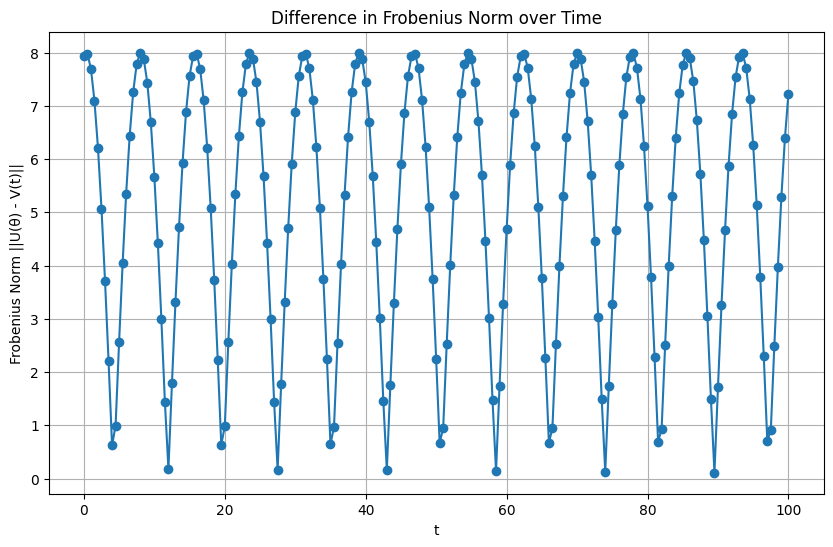

In [22]:
if frobenius_norms_over_time:
    sorted_times_for_plot = sorted(frobenius_norms_over_time.keys())
    norm_values_for_plot = [frobenius_norms_over_time[t] for t in sorted_times_for_plot]
    
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_times_for_plot, norm_values_for_plot, marker='o', linestyle='-', label='Frobenius Norm ')
    
    plt.xlabel("t")
    plt.ylabel("Frobenius Norm ||U(θ) - V(t)||")
    plt.title("Difference in Frobenius Norm over Time")
    plt.grid(True)
    plt.show()
else:
    print("Không có dữ liệu Frobenius norm để vẽ đồ thị.")

In [23]:
import pennylane as qml
from pennylane import numpy as np

# Dictionary để lưu kết quả fidelity
fidelities_over_time = {}

# Lặp qua từng bước thời gian t trong mảng
for t in all_psi_t_exact.keys():
    # Lấy ra trạng thái lý tưởng và trạng thái gần đúng tại thời điểm t
    psi_exact = all_psi_t_exact[t]
    psi_approx = all_psi_t_pennylane[t]
    
    # 1. Chuyển đổi state vectors thành density matrices
    dm_exact = qml.math.dm_from_state_vector(psi_exact)
    dm_approx = qml.math.dm_from_state_vector(psi_approx)
    
    # 2. Tính fidelity và lưu vào dictionary
    fidelity = qml.math.fidelity(dm_exact, dm_approx)
    fidelities_over_time[t] = fidelity

# In kết quả
print("Fidelity tại từng bước thời gian:")
for t, f in fidelities_over_time.items():
    print(f"  - Thời gian t={t}: Fidelity = {f:.8f}")

KeyError: tensor(0., requires_grad=True)

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Công thức: Fidelity = |<psi_exact|psi_train>|^2

fidelities_over_time = {}
for t in all_psi_t_pennylane.keys():
    psi_exact = all_psi_t_exact[t]
    psi_train = all_psi_t_pennylane[t]
    

    # dm_exact = qml.math.dm_from_state_vector(psi_exact)
    # dm_train = qml.math.dm_from_state_vector(psi_train)

    # fidelity = qml.math.fidelity(dm_exact, dm_train)
    # fidelities_over_time[t] = fidelity

    inner_product = np.dot(psi_exact.conj(), psi_train)

    fidelity = np.abs(inner_product)**2
    fidelities_over_time[t] = fidelity

print(fidelities_over_time)


sorted_times = sorted(fidelities_over_time.keys())
sorted_fidelities = [fidelities_over_time[t] for t in sorted_times]

plt.figure(figsize=(10, 6))

plt.plot(sorted_times, sorted_fidelities, marker='o', linestyle='-', color='royalblue', label='Fidelity')

plt.title('Fidelity over time', fontsize=16)
plt.xlabel('t', fontsize=12)
plt.ylabel('Fidelity', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# plt.ylim(0,2)

plt.show()

KeyError: 0.0

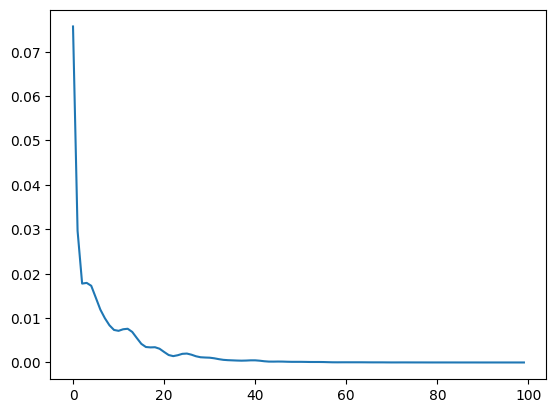

In [23]:
import matplotlib.pyplot as plt
plt.plot(costs)

In [42]:
if num_qubits > 0:
    pauli_z_list = []
    for i in range(num_qubits):
        # Tạo chuỗi Pauli, ví dụ: "IIZI" cho qubit 2 trong hệ 4 qubit
        pauli_str_list = ['I'] * num_qubits
        pauli_str_list[i] = 'Z'
        pauli_z_list.append("".join(pauli_str_list))

    # Tạo SparsePauliOp cho M_z
    # Ví dụ: cho 2 qubit, M_z = ZI + IZ
    # Với hệ 4 qubit, nó sẽ là ZIII + IZII + IIZI + IIIZ
    magnetization_z_op = SparsePauliOp(pauli_z_list, coeffs=[1.0] * num_qubits)
    print("Toán tử Độ từ hóa M_z đã được định nghĩa:")
    print(magnetization_z_op)
else:
    magnetization_z_op = None
    print("Không có qubit để định nghĩa toán tử Độ từ hóa.")

Toán tử Độ từ hóa M_z đã được định nghĩa:
SparsePauliOp(['ZIII', 'IZII', 'IIZI', 'IIIZ'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j])


In [40]:
problem.num_spatial_orbitals

2

$
\langle \mu_z(t) \rangle = \langle\Psi(\theta_t)| \hat{\mu}_z |\Psi(\theta_t)\rangle = \langle\Psi(t)| \hat{\mu}_z |\Psi(t)\rangle
$

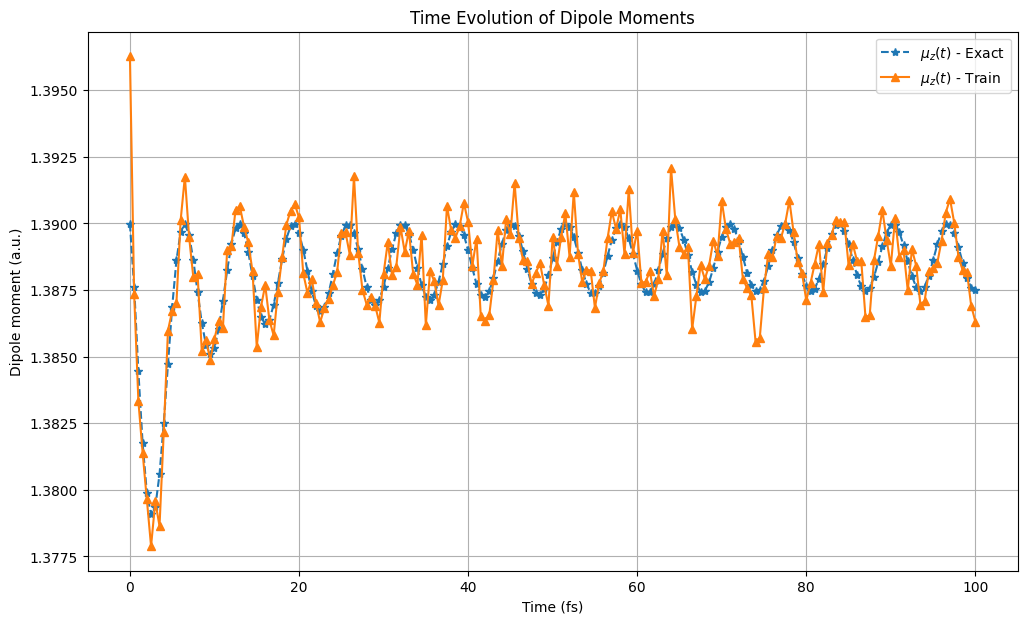

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp 
import qiskit 

def calculate_expectation_value(state_vector_flat, pauli_op_sparse):
    if pauli_op_sparse is None or state_vector_flat is None:
        return np.nan
    sv = Statevector(state_vector_flat)
    try:
        exp_val = sv.expectation_value(pauli_op_sparse)
        return exp_val.real 
    except Exception as e_exp:
        print(f"    Lỗi khi tính giá trị kỳ vọng: {e_exp}")
        return np.nan

times_plot_exact = []
mux_plot_exact = []
muy_plot_exact = []
muz_plot_exact = []

times_plot_pennylane = []
mux_plot_pennylane = []
muy_plot_pennylane = []
muz_plot_pennylane = []

# Pennylane
sorted_times_pennylane = sorted(all_psi_t_pennylane.keys())

for t_current in sorted_times_pennylane:
    psi_t_pennylane = all_psi_t_pennylane[t_current]

    if psi_t_pennylane is not None:
        # print(f"  Tính toán cho t = {t_current:.4f} (Pennylane)") 
        times_plot_pennylane.append(t_current)
        mux_plot_pennylane.append(calculate_expectation_value(psi_t_pennylane, x_dipole_qubit if 'dipole_qubit_X' in locals() and x_dipole_qubit is not None else None))
        muy_plot_pennylane.append(calculate_expectation_value(psi_t_pennylane, y_dipole_qubit if 'dipole_qubit_Y' in locals() and y_dipole_qubit is not None else None))
        muz_plot_pennylane.append(calculate_expectation_value(psi_t_pennylane, z_dipole_qubit))
    else:
        times_plot_pennylane.append(t_current)
        mux_plot_pennylane.append(np.nan)
        muy_plot_pennylane.append(np.nan)
        muz_plot_pennylane.append(np.nan)

times_pennylane = np.array(times_plot_pennylane)
mux_pennylane = np.array(mux_plot_pennylane)
muy_pennylane = np.array(muy_plot_pennylane)
muz_pennylane = np.array(muz_plot_pennylane)

# Exact
sorted_times = sorted(all_psi_t_exact.keys())

for t_current in sorted_times:
    psi_t = all_psi_t_exact[t_current]
    
    if psi_t is not None: 
        times_plot_exact.append(t_current)

        current_mux = calculate_expectation_value(psi_t, x_dipole_qubit if 'dipole_qubit_X' in locals() and x_dipole_qubit is not None else None)
        current_muy = calculate_expectation_value(psi_t, y_dipole_qubit if 'dipole_qubit_Y' in locals() and y_dipole_qubit is not None else None)
        current_muz = calculate_expectation_value(psi_t, z_dipole_qubit) 

        mux_plot_exact.append(current_mux)
        muy_plot_exact.append(current_muy)
        muz_plot_exact.append(current_muz)
    else:

        times_plot_exact.append(t_current)
        mux_plot_exact.append(np.nan)
        muy_plot_exact.append(np.nan)
        muz_plot_exact.append(np.nan)

times_exact = np.array(times_plot_exact)
mux_exact = np.array(mux_plot_exact)
muy_exact = np.array(muy_plot_exact)
muz_exact = np.array(muz_plot_exact)

plt.figure(figsize=(12, 7))

# Vẽ đường "Exact" 
if  mux_exact.size > 0 and np.any(~np.isnan(mux_exact)) and np.any(mux_exact != 0):
    plt.plot(times_exact, mux_exact, label="$\mu_x(t)$ - Exact", marker='x', linestyle='--')
if muy_exact.size > 0 and np.any(~np.isnan(muy_exact)) and np.any(muy_exact != 0):
    plt.plot(times_exact, muy_exact, label="$\mu_y(t)$ - Exact", marker='+', linestyle='--')
if muz_exact.size > 0 and np.any(~np.isnan(muz_exact)):
    plt.plot(times_exact, muz_exact, label="$\mu_z(t)$ - Exact", marker='*', linestyle='--')

# Vẽ đường từ kết quả Pennylane
if mux_pennylane.size > 0 and np.any(~np.isnan(mux_pennylane)) and np.any(mux_pennylane != 0):
    plt.plot(times_pennylane, mux_pennylane, label="$\mu_x(t)$ - Train", marker='o', linestyle='-')
if muy_pennylane.size > 0 and np.any(~np.isnan(muy_pennylane)) and np.any(muy_pennylane != 0):
    plt.plot(times_pennylane, muy_pennylane, label="$\mu_y(t)$ - Train", marker='s', linestyle='-')
if muz_pennylane.size > 0 and np.any(~np.isnan(muz_pennylane)):
    plt.plot(times_pennylane, muz_pennylane, label="$\mu_z(t)$ - Train", marker='^', linestyle='-')

plt.xlabel("Time (fs)")
plt.ylabel("Dipole moment (a.u.)")
plt.title("Time Evolution of Dipole Moments")


handles, labels = plt.gca().get_legend_handles_labels()
if labels:
    plt.legend()

plt.grid(True)
plt.show()


In [29]:
for i in range(len(times_plot_exact)):
        t = times_plot_exact[i]
        mz = muz_plot_exact[i]
        
        print(f"Thời điểm t = {t:.4f}:")
        print(f"  μ_z = {mz:.6f}" if not np.isnan(mz) else "  μ_z = N/A")
        print("-" * 20)

Thời điểm t = 0.0000:
  μ_z = 1.388961
--------------------
Thời điểm t = 5.2632:
  μ_z = 1.387445
--------------------
Thời điểm t = 10.5263:
  μ_z = 1.386789
--------------------
Thời điểm t = 15.7895:
  μ_z = 1.387257
--------------------
Thời điểm t = 21.0526:
  μ_z = 1.388236
--------------------
Thời điểm t = 26.3158:
  μ_z = 1.388892
--------------------
Thời điểm t = 31.5789:
  μ_z = 1.388871
--------------------
Thời điểm t = 36.8421:
  μ_z = 1.388478
--------------------
Thời điểm t = 42.1053:
  μ_z = 1.388259
--------------------
Thời điểm t = 47.3684:
  μ_z = 1.388451
--------------------
Thời điểm t = 52.6316:
  μ_z = 1.388815
--------------------
Thời điểm t = 57.8947:
  μ_z = 1.388958
--------------------
Thời điểm t = 63.1579:
  μ_z = 1.388768
--------------------
Thời điểm t = 68.4211:
  μ_z = 1.388505
--------------------
Thời điểm t = 73.6842:
  μ_z = 1.388486
--------------------
Thời điểm t = 78.9474:
  μ_z = 1.388726
--------------------
Thời điểm t = 84.2105:
  μ

In [30]:
for i in range(len(times_plot_pennylane)):
        t = times_plot_pennylane[i]
        mz = muz_plot_pennylane[i]
        
        print(f"Thời điểm t = {t:.4f}:")
        print(f"  μ_z = {mz:.6f}" if not np.isnan(mz) else "  μ_z = N/A")
        print("-" * 20)

Thời điểm t = 0.0000:
  μ_z = 1.388961
--------------------
Thời điểm t = 5.2632:
  μ_z = 1.387446
--------------------
Thời điểm t = 10.5263:
  μ_z = 1.386789
--------------------
Thời điểm t = 15.7895:
  μ_z = 1.387143
--------------------
Thời điểm t = 21.0526:
  μ_z = 1.388236
--------------------
Thời điểm t = 26.3158:
  μ_z = 1.388892
--------------------
Thời điểm t = 31.5789:
  μ_z = 1.388872
--------------------
Thời điểm t = 36.8421:
  μ_z = 1.388478
--------------------
Thời điểm t = 42.1053:
  μ_z = 1.388259
--------------------
Thời điểm t = 47.3684:
  μ_z = 1.388451
--------------------
Thời điểm t = 52.6316:
  μ_z = 1.388815
--------------------
Thời điểm t = 57.8947:
  μ_z = 1.388958
--------------------
Thời điểm t = 63.1579:
  μ_z = 1.388768
--------------------
Thời điểm t = 68.4211:
  μ_z = 1.388505
--------------------
Thời điểm t = 73.6842:
  μ_z = 1.388486
--------------------
Thời điểm t = 78.9474:
  μ_z = 1.388726
--------------------
Thời điểm t = 84.2105:
  μ

In [26]:
import pennylane as qml
from pennylane import numpy as pnp
import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import Operator, Statevector, SparsePauliOp

# Sử dụng từ điển all_psi_t_pennylane đã được tính toán từ mô phỏng của bạn
times_train_magnetization = []
times_exact_magnetization = []
magnetization_train = []
magnetization_exact = []

if 'all_psi_t_pennylane' in locals() and all_psi_t_pennylane:
    print("\n--- Tính toán Độ từ hóa từ Psi(t) của Pennylane ---")

    # Sắp xếp các thời điểm để đảm bảo đồ thị được vẽ đúng thứ tự
    sorted_times = sorted(all_psi_t_pennylane.keys())

    for t_current in sorted_times:
        psi_t_pennylane_current = all_psi_t_pennylane.get(t_current)
        if psi_t_pennylane_current is not None:
            times_train_magnetization.append(t_current)

            # Tính giá trị kỳ vọng của toán tử M_z
            current_magnetization_train = calculate_expectation_value(psi_t_pennylane_current, magnetization_x_op)
            magnetization_train.append(current_magnetization_train)

            print(f"Thời điểm t = {t_current:.4f}:")
            print(f"  ⟨M_z⟩ = {current_magnetization_train:.6f}" if not np.isnan(current_magnetization_train) else "  ⟨M_z⟩ = N/A")
        else:
            print(f"Thời điểm t = {t_current:.4f}: Không có dữ liệu Psi(t).")
            times_train_magnetization.append(t_current)
            magnetization_train.append(np.nan)

else:
    print("\nKhông có dữ liệu 'all_psi_t_pennylane' để tính toán độ từ hóa.")

if 'all_psi_t_exact' in locals() and all_psi_t_exact:
    print("\n--- Tính toán Độ từ hóa từ Psi(t) của Exact ---")

    # Sắp xếp các thời điểm để đảm bảo đồ thị được vẽ đúng thứ tự
    sorted_times = sorted(all_psi_t_exact.keys())

    for t_current in sorted_times:
        psi_t_exact_current = all_psi_t_exact.get(t_current)
        if psi_t_exact_current is not None:
            times_exact_magnetization.append(t_current)

            # Tính giá trị kỳ vọng của toán tử M_z
            current_magnetization_exact = calculate_expectation_value(psi_t_exact_current, magnetization_x_op)
            magnetization_exact.append(current_magnetization_exact)

            print(f"Thời điểm t = {t_current:.4f}:")
            print(f"  ⟨M_z⟩ = {current_magnetization_exact:.6f}" if not np.isnan(current_magnetization_exact) else "  ⟨M_z⟩ = N/A")
        else:
            print(f"Thời điểm t = {t_current:.4f}: Không có dữ liệu Psi(t).")
            times_exact_magnetization.append(t_current)
            magnetization_exact.append(np.nan)

else:
    print("\nKhông có dữ liệu 'all_psi_t_exact' để tính toán độ từ hóa.")

# --- 3. Vẽ đồ thị Độ từ hóa ---
if magnetization_train: # Chỉ vẽ nếu có dữ liệu
    plt.figure(figsize=(12, 7))

    # Lọc ra các điểm hợp lệ để vẽ (tránh lỗi nếu có giá trị nan)
    valid_indices = ~np.isnan(magnetization_train)

    if np.any(valid_indices):
        # Vẽ đường từ kết quả Exact
        plt.plot(np.array(times_exact_magnetization)[valid_indices],
                 np.array(magnetization_exact)[valid_indices],
                 label="⟨M_z(t)⟩ - Exact",  marker='x', linestyle='-')
        # Vẽ đường từ kết quả Pennylane
        plt.plot(np.array(times_train_magnetization)[valid_indices],
                 np.array(magnetization_train)[valid_indices],
                 label="⟨M_z(t)⟩ - Train", marker='*', linestyle='-')

        plt.xlabel("t(fs)")
        plt.ylabel("Magnetization (a.u.)")
        plt.title("Magnetization Evolution over Time")
        handles, labels = plt.gca().get_legend_handles_labels()
        if labels:
            plt.legend(handles, labels, loc='upper right')
            # plt.xticks(rotation=45)
            plt.tight_layout()
            # Hiển thị đồ thị
            plt.axhline(0, color='gray', linestyle='--', linewidth=0.5) 
            plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
            plt.title("Magnetization Evolution over Time")
            plt.xlabel("Time (fs)")
            plt.ylabel("Magnetization (a.u.)")
            plt.grid(True)
            plt.show()
    else:
        print("Không có giá trị độ từ hóa hợp lệ để vẽ đồ thị.")
else:
    print("Không có dữ liệu để vẽ đồ thị độ từ hóa.")




--- Tính toán Độ từ hóa từ Psi(t) của Pennylane ---


NameError: name 'magnetization_x_op' is not defined

In [ ]:
import pennylane as qml
from pennylane import numpy as pnp
import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import Operator, Statevector, SparsePauliOp

# --- 1. Định nghĩa Toán tử Độ từ hóa M_z ---
# Toán tử này là tổng của các toán tử Pauli-Z trên mỗi qubit
if num_qubits > 0:
    pauli_z_list = []
    for i in range(num_qubits):
        # Tạo chuỗi Pauli, ví dụ: "IIZI" cho qubit 2 trong hệ 4 qubit
        pauli_str_list = ['I'] * num_qubits
        pauli_str_list[i] = 'Z'
        pauli_z_list.append("".join(pauli_str_list))
    
    # Tạo SparsePauliOp cho M_z
    # Ví dụ: cho 2 qubit, M_z = ZI + IZ
    magnetization_z_op = SparsePauliOp(pauli_z_list, coeffs=[1.0] * num_qubits)
    print("Toán tử Độ từ hóa M_z:")
    print(magnetization_z_op)
else:
    magnetization_z_op = None
    print("Không có qubit để định nghĩa toán tử Độ từ hóa.")

# --- Hàm tính giá trị kỳ vọng (giống như trước) ---
def calculate_expectation_value(state_vector_flat, pauli_op_sparse):
    if pauli_op_sparse is None or state_vector_flat is None:
        return np.nan
    sv_data = state_vector_flat.numpy() if hasattr(state_vector_flat, 'numpy') else np.asarray(state_vector_flat)
    if sv_data.size == 0 or sv_data.ndim == 0:
        return np.nan
    try:
        sv = Statevector(sv_data)
        exp_val = sv.expectation_value(pauli_op_sparse)
        return exp_val.real
    except Exception as e_exp:
        # print(f"      Lỗi khi tính giá trị kỳ vọng: {e_exp}")
        return np.nan

# --- 2. Tính toán giá trị kỳ vọng của M_z tại mỗi thời điểm ---
# Sử dụng từ điển all_psi_t_pennylane đã được tính toán từ mô phỏng của bạn
times_plot_magnetization = []
magnetization_plot_values = []

if 'all_psi_t_pennylane' in locals() and all_psi_t_pennylane:
    print("\n--- Tính toán Độ từ hóa từ Psi(t) của Pennylane ---")
    
    # Sắp xếp các thời điểm để đảm bảo đồ thị được vẽ đúng thứ tự
    sorted_times = sorted(all_psi_t_pennylane.keys())
    
    for t_current in sorted_times:
        psi_t_pennylane_current = all_psi_t_pennylane.get(t_current)
        if psi_t_pennylane_current is not None:
            times_plot_magnetization.append(t_current)
            
            # Tính giá trị kỳ vọng của toán tử M_z
            current_magnetization = calculate_expectation_value(psi_t_pennylane_current, magnetization_z_op)
            magnetization_plot_values.append(current_magnetization)
            
            print(f"Thời điểm t = {t_current:.4f}:")
            print(f"  ⟨M_z⟩ = {current_magnetization:.6f}" if not np.isnan(current_magnetization) else "  ⟨M_z⟩ = N/A")
        else:
            print(f"Thời điểm t = {t_current:.4f}: Không có dữ liệu Psi(t).")
            times_plot_magnetization.append(t_current)
            magnetization_plot_values.append(np.nan)
        
else:
    print("\nKhông có dữ liệu 'all_psi_t_pennylane' để tính toán độ từ hóa.")

# --- 3. Vẽ đồ thị Độ từ hóa ---
if magnetization_plot_values: # Chỉ vẽ nếu có dữ liệu
    plt.figure(figsize=(12, 7))
    
    # Lọc ra các điểm hợp lệ để vẽ (tránh lỗi nếu có giá trị nan)
    valid_indices = ~np.isnan(magnetization_plot_values)
    
    if np.any(valid_indices):
        plt.plot(np.array(times_plot_magnetization)[valid_indices], 
                 np.array(magnetization_plot_values)[valid_indices], 
                 label="⟨M_z(t)⟩ - Pennylane", marker='o', linestyle='-')

        plt.xlabel("Thời gian")
        plt.ylabel("Độ từ hóa (a.u.)")
        plt.title("Sự tiến hóa của Độ từ hóa theo thời gian")
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("Không có giá trị độ từ hóa hợp lệ để vẽ đồ thị.")
else:
    print("Không có dữ liệu để vẽ đồ thị độ từ hóa.")


In [ ]:
for i in range(len(times_plot_pennylane)):
        t = times_pennylane[i]
        mx = mux_plot_pennylane[i]
        my = muy_plot_pennylane[i]
        mz = muz_plot_pennylane[i]
        
        print(f"Thời điểm t = {t:.4f}:")
        print(f"  μ_x = {mx:.6f}" if not np.isnan(mx) else "  μ_x = N/A")
        print(f"  μ_y = {my:.6f}" if not np.isnan(my) else "  μ_y = N/A")
        print(f"  μ_z = {mz:.6f}" if not np.isnan(mz) else "  μ_z = N/A")
        print("-" * 20)


Thời điểm t = 0.0000:
  μ_x = N/A
  μ_y = N/A
  μ_z = 1.389651
--------------------
Thời điểm t = 1.1111:
  μ_x = N/A
  μ_y = N/A
  μ_z = 1.383636
--------------------
Thời điểm t = 2.2222:
  μ_x = N/A
  μ_y = N/A
  μ_z = 1.379583
--------------------
Thời điểm t = 3.3333:
  μ_x = N/A
  μ_y = N/A
  μ_z = 1.380405
--------------------
Thời điểm t = 4.4444:
  μ_x = N/A
  μ_y = N/A
  μ_z = 1.386945
--------------------
Thời điểm t = 5.5556:
  μ_x = N/A
  μ_y = N/A
  μ_z = 1.388587
--------------------
Thời điểm t = 6.6667:
  μ_x = N/A
  μ_y = N/A
  μ_z = 1.389599
--------------------
Thời điểm t = 7.7778:
  μ_x = N/A
  μ_y = N/A
  μ_z = 1.387882
--------------------
Thời điểm t = 8.8889:
  μ_x = N/A
  μ_y = N/A
  μ_z = 1.385815
--------------------
Thời điểm t = 10.0000:
  μ_x = N/A
  μ_y = N/A
  μ_z = 1.385635
--------------------


In [ ]:
for i in range(len(times_plot_np_exact)):
        t = times_plot_np_exact[i]
        mx = mux_plot_exact[i]
        my = muy_plot_exact[i]
        mz = muz_plot_exact[i]
        
        print(f"Thời điểm t = {t:.4f}:")
        print(f"  μ_x = {mx:.6f}" if not np.isnan(mx) else "  μ_x = N/A")
        print(f"  μ_y = {my:.6f}" if not np.isnan(my) else "  μ_y = N/A")
        print(f"  μ_z = {mz:.6f}" if not np.isnan(mz) else "  μ_z = N/A")
        print("-" * 20)


Thời điểm t = 0.0000:
  μ_x = N/A
  μ_y = N/A
  μ_z = 1.389661
--------------------
Thời điểm t = 0.1010:
  μ_x = N/A
  μ_y = N/A
  μ_z = 1.389496
--------------------
Thời điểm t = 0.2020:
  μ_x = N/A
  μ_y = N/A
  μ_z = 1.389078
--------------------
Thời điểm t = 0.3030:
  μ_x = N/A
  μ_y = N/A
  μ_z = 1.388528
--------------------
Thời điểm t = 0.4040:
  μ_x = N/A
  μ_y = N/A
  μ_z = 1.387921
--------------------
Thời điểm t = 0.5051:
  μ_x = N/A
  μ_y = N/A
  μ_z = 1.387290
--------------------
Thời điểm t = 0.6061:
  μ_x = N/A
  μ_y = N/A
  μ_z = 1.386654
--------------------
Thời điểm t = 0.7071:
  μ_x = N/A
  μ_y = N/A
  μ_z = 1.386021
--------------------
Thời điểm t = 0.8081:
  μ_x = N/A
  μ_y = N/A
  μ_z = 1.385399
--------------------
Thời điểm t = 0.9091:
  μ_x = N/A
  μ_y = N/A
  μ_z = 1.384791
--------------------
Thời điểm t = 1.0101:
  μ_x = N/A
  μ_y = N/A
  μ_z = 1.384202
--------------------
Thời điểm t = 1.1111:
  μ_x = N/A
  μ_y = N/A
  μ_z = 1.383635
-------------

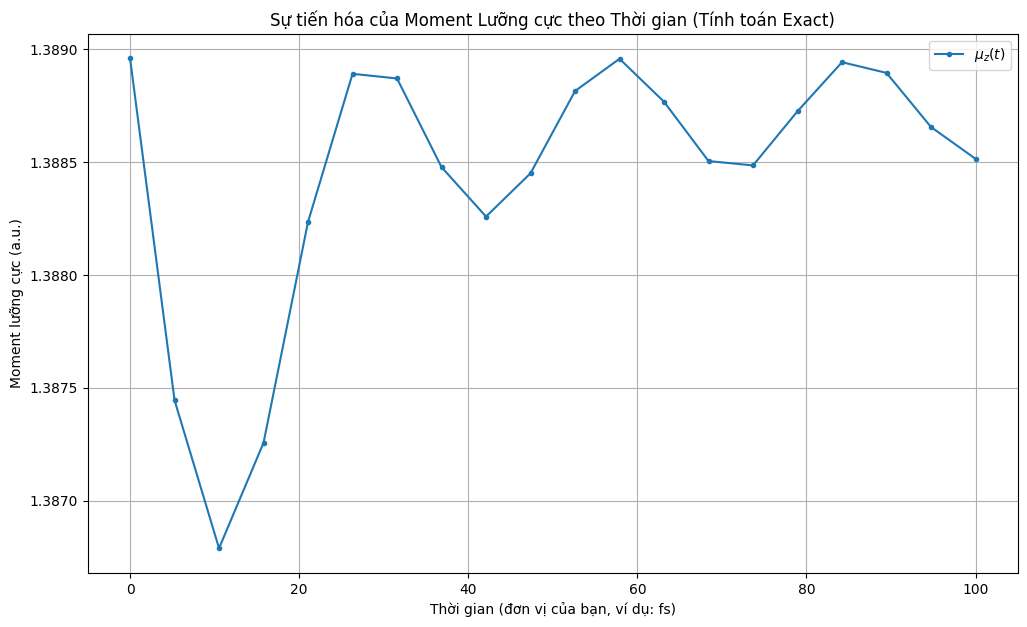

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp # Đảm bảo SparsePauliOp được import
import qiskit # Cần thiết cho QuantumCircuit

def calculate_expectation_value(state_vector_flat, pauli_op_sparse):
    if pauli_op_sparse is None or state_vector_flat is None:
        return np.nan
    sv = Statevector(state_vector_flat)
    try:
        exp_val = sv.expectation_value(pauli_op_sparse)
        return exp_val.real 
    except Exception as e_exp:
        print(f"    Lỗi khi tính giá trị kỳ vọng: {e_exp}")
        return np.nan

times_to_simulate_exact = np.linspace(0, 10, 4)

psi_0_vqe_col = psi_0_vqe.reshape(-1, 1)

times_plot_exact = []
mux_plot_exact = []
muy_plot_exact = []
muz_plot_exact = []

sorted_times = sorted(all_psi_t_exact.keys())

for t_current in sorted_times:
    psi_t = all_psi_t_exact[t_current]
    
    if psi_t is not None: 
        times_plot_exact.append(t_current)
        

        current_mux = calculate_expectation_value(psi_t, dipole_qubit_X if 'dipole_qubit_X' in locals() and dipole_qubit_X is not None else None)
        current_muy = calculate_expectation_value(psi_t, dipole_qubit_Y if 'dipole_qubit_Y' in locals() and dipole_qubit_Y is not None else None)
        current_muz = calculate_expectation_value(psi_t, z_dipole_qubit) # Giả định dipole_qubit_Z luôn có

        mux_plot_exact.append(current_mux)
        muy_plot_exact.append(current_muy)
        muz_plot_exact.append(current_muz)
    else:

        times_plot_exact.append(t_current)
        mux_plot_exact.append(np.nan)
        muy_plot_exact.append(np.nan)
        muz_plot_exact.append(np.nan)

times_plot_np_exact = np.array(times_plot_exact)
mux_plot_np = np.array(mux_plot_exact)
muy_plot_np = np.array(muy_plot_exact)
muz_plot_np_exact = np.array(muz_plot_exact)

plt.figure(figsize=(12, 7))

if np.any(~np.isnan(mux_plot_np)) and np.any(mux_plot_np != 0): 
    plt.plot(times_plot_np_exact, mux_plot_np, label="$\mu_x(t)$", marker='.')
if np.any(~np.isnan(muy_plot_np)) and np.any(muy_plot_np != 0): 
    plt.plot(times_plot_np_exact, muy_plot_np, label="$\mu_y(t)$", marker='.')
if np.any(~np.isnan(muz_plot_np_exact)): # Thành phần Z thường có giá trị
    plt.plot(times_plot_np_exact, muz_plot_np_exact, label="$\mu_z(t)$", marker='.')

plt.xlabel(f"Thời gian (đơn vị của bạn, ví dụ: fs)")
plt.ylabel("Moment lưỡng cực (a.u.)")
plt.title("Sự tiến hóa của Moment Lưỡng cực theo Thời gian (Tính toán Exact)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector, SparsePauliOp # Đảm bảo SparsePauliOp được import

def calculate_expectation_value(state_vector_flat, pauli_op_sparse):
    if pauli_op_sparse is None:
        return 0.0 
    if state_vector_flat is None: # Kiểm tra nếu psi(t) không hợp lệ
        return np.nan # Trả về NaN nếu trạng thái không hợp lệ
        
    sv = Statevector(state_vector_flat)
    try:
        exp_val = sv.expectation_value(pauli_op_sparse)
        return exp_val.real 
    except Exception as e_exp:
        print(f"    Lỗi khi tính giá trị kỳ vọng: {e_exp}")
        return np.nan # Trả về NaN nếu có lỗi

sorted_times = sorted(all_psi_t_exact.keys())

times_plot = []
mux_plot = []
muy_plot = []
muz_plot = []

for t_current in sorted_times:
    psi_t = all_psi_t_approximated[t_current]
    if psi_t is not None: 
        times_plot.append(t_current)
        

        current_mux = calculate_expectation_value(psi_t, dipole_qubit_X if 'dipole_qubit_X' in locals() and dipole_qubit_X is not None else None)
        current_muy = calculate_expectation_value(psi_t, dipole_qubit_Y if 'dipole_qubit_Y' in locals() and dipole_qubit_Y is not None else None)
        current_muz = calculate_expectation_value(psi_t, dipole_qubit) # Giả định dipole_qubit_Z luôn có

        mux_plot.append(current_mux)
        muy_plot.append(current_muy)
        muz_plot.append(current_muz)
    else:

        times_plot.append(t_current)
        mux_plot.append(np.nan)
        muy_plot.append(np.nan)
        muz_plot.append(np.nan)


times_plot_np = np.array(times_plot)
mux_plot_np = np.array(mux_plot)
muy_plot_np = np.array(muy_plot)
muz_plot_np = np.array(muz_plot)

plt.figure(figsize=(12, 7))

if np.any(~np.isnan(mux_plot_np)) and np.any(mux_plot_np != 0): 
    plt.plot(times_plot_np, mux_plot_np, label="$\mu_x(t)$", marker='.')
if np.any(~np.isnan(muy_plot_np)) and np.any(muy_plot_np != 0): 
    plt.plot(times_plot_np, muy_plot_np, label="$\mu_y(t)$", marker='.')
if np.any(~np.isnan(muz_plot_np)): 
    plt.plot(times_plot_np, muz_plot_np, label="$\mu_z(t)$", marker='.')

plt.xlabel("Thời gian (fs)")
plt.ylabel("Moment lưỡng cực (a.u.)")
plt.title("Tiến hóa của Moment Lưỡng cực theo Thời gian")
plt.legend()
plt.grid(True)
plt.show()



NameError: name 'all_psi_t_approximated' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import windows

# 1. Xác định bước thời gian và số điểm cho FFT
if len(times_plot_exact) < 2:
    print("Lỗi: Cần ít nhất 2 điểm thời gian để thực hiện FFT.")
    # Thoát hoặc xử lý lỗi phù hợp
else:
    dt_fourier = times_plot_exact[1] - times_plot_exact[0]
    N_points = len(times_plot_exact)

    # 2. Chuẩn bị tín hiệu moment lưỡng cực d_z(t)
    # Áp dụng hàm cửa sổ để giảm hiệu ứng rò rỉ phổ (tùy chọn nhưng khuyến khích)
    # window = windows.hann(N_points) # Ví dụ dùng cửa sổ Hanning
    mu_t = muz_plot_exact - np.mean(muz_plot_exact)
    window = windows.blackman(N_points) # Cửa sổ Blackman thường tốt hơn
    d_z_t_windowed = muz_plot_exact * window

    # Tính biến đổi Fourier của d_z(t)
    d_z_omega = fft(d_z_t_windowed)
    
    # Tạo mảng tần số góc omega cho FFT
    # fftfreq trả về tần số theo chu kỳ (cycles/unit-time)
    # Nhân với 2*pi để ra tần số góc (radians/unit-time)
    omega_fft_full = fftfreq(N_points, dt_fourier) * 2 * np.pi

    # 3. Chuẩn bị tín hiệu trường điện từ E_z(t) và tính FFT
    def f_t_lorentz(t, E0, Gamma):
        E0 = 0.01
        Gamma = 0.25
        return (E0 / np.pi) * Gamma / (Gamma**2 + t**2)

    times_plot_exact_np = np.array(times_plot_exact)
    E0 =0.01
    Gamma = 0.25
    electric_field_z_t = f_t_lorentz(times_plot_exact_np, E0, Gamma)
    E_z_t_windowed = electric_field_z_t * window # Cũng nên áp dụng cửa sổ cho E(t)
    E_z_omega_full = fft(E_z_t_windowed)

    # 4. Tính alpha_zz(omega)
    # Chỉ xét các tần số dương vì phổ thường đối xứng
    # Sử dụng fftshift để đưa thành phần tần số 0 về giữa, sau đó lấy nửa phải
    
    # Dịch chuyển 0-frequency component về giữa mảng
    d_z_omega_shifted = fftshift(d_z_omega)
    E_z_omega_shifted = fftshift(E_z_omega_full)
    omega_fft_shifted = fftshift(omega_fft_full)

    # Lấy các chỉ số cho tần số dương (và có thể cả tần số 0 nếu muốn)
    # Vì đã dịch chuyển, các tần số dương nằm ở nửa sau của mảng
    positive_freq_indices = omega_fft_shifted >= 0 
    
    omega_positive = omega_fft_shifted[positive_freq_indices]
    d_z_omega_positive = d_z_omega_shifted[positive_freq_indices]
    E_z_omega_positive = E_z_omega_shifted[positive_freq_indices]
    
    # Tính alpha_zz(omega), tránh chia cho 0
    alpha_zz_omega = np.zeros_like(d_z_omega_positive, dtype=complex)
    # Ngưỡng nhỏ để tránh chia cho các giá trị E_z_omega rất gần 0
    valid_E_indices = np.abs(E_z_omega_positive) > 1e-9 
    
    alpha_zz_omega[valid_E_indices] = d_z_omega_positive[valid_E_indices] / E_z_omega_positive[valid_E_indices]

    # 5. Tính sigma_abs(omega)
    c_au = 137.035999084 # Tốc độ ánh sáng trong đơn vị nguyên tử (Hartree_energy*bohr/hbar)
    
    # sigma_abs = (4 * np.pi * omega / c) * Im[alpha]
    sigma_abs_omega = (4 * np.pi * omega_positive / c_au) * np.imag(alpha_zz_omega)
    
    # Loại bỏ các giá trị âm không vật lý của sigma (có thể xảy ra do nhiễu số học)
    sigma_abs_omega[sigma_abs_omega < 0] = 0

    # 6. Chuyển đổi omega sang eV để vẽ đồ thị (tùy chọn)
    # 1 Hartree (đơn vị năng lượng/tần số góc trong a.u.) = 27.211386245988 eV
    hartree_to_ev = 27.211386245988
    omega_ev = omega_positive * hartree_to_ev

    # 7. Vẽ phổ hấp thụ
    plt.figure(figsize=(10, 6))
    plt.plot(omega_ev, sigma_abs_omega)
    plt.xlabel("Năng lượng $\omega$ (eV)")
    plt.ylabel("$\sigma_{abs}(\omega)$ (a.u.)")
    plt.title("Phổ hấp thụ H2")
    plt.grid(True)
    # Giới hạn trục x để tập trung vào vùng có tín hiệu
    meaningful_range = omega_ev[sigma_abs_omega > 0.01 * np.max(sigma_abs_omega)] if np.any(sigma_abs_omega > 0) else [0,10]
    if len(meaningful_range) > 0:
         xlim_min = max(0, np.min(meaningful_range) - 1)
         xlim_max = min(np.max(omega_ev) if np.max(omega_ev)>0 else 10, np.max(meaningful_range) + 1)
         if xlim_max > xlim_min: # Đảm bảo khoảng hợp lệ
            plt.xlim(xlim_min, xlim_max)
    else:
        plt.xlim(0,10) # Mặc định nếu không có đỉnh rõ ràng

    plt.ylim(bottom=0) # Tiết diện hấp thụ không âmy
    plt.show()

NameError: name 'times_plot_exact' is not defined

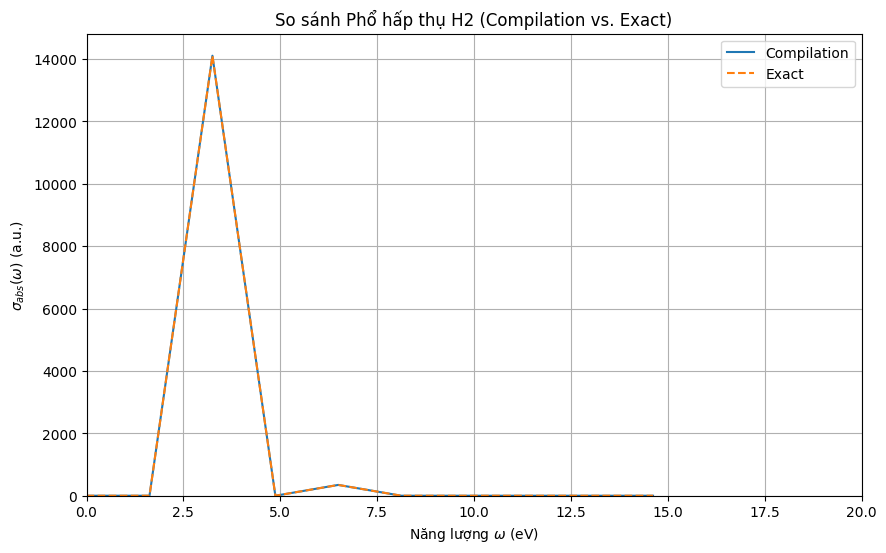

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import windows

# 1. Xác định các tham số chung
if len(times_plot_exact) < 2:
    print("Lỗi: Cần ít nhất 2 điểm thời gian để thực hiện FFT.")
else:
    dt_fourier = times_plot_exact[1] - times_plot_exact[0]
    N_points = len(times_plot_exact)

    # 2. Chuẩn bị các tín hiệu E(t) và d(t)
    window = windows.blackman(N_points)
    
    # Tín hiệu từ Pennylane
    d_z_t_pennylane_windowed = muz_plot_pennylane * window
    
    # Tín hiệu chính xác (exact)
    d_z_t_exact_windowed = muz_plot_exact * window

    # Tín hiệu trường điện từ (giống nhau cho cả hai trường hợp)
    def f_t_lorentz(t, E0, Gamma):
        return (E0 / np.pi) * Gamma / (Gamma**2 + t**2)
    times_plot_exact_np = np.array(times_plot_exact)
    E0 = 0.01
    Gamma = 0.25
    electric_field_z_t = f_t_lorentz(times_plot_exact_np, E0, Gamma)
    E_z_t_windowed = electric_field_z_t * window

    # 3. Thực hiện FFT
    d_z_omega_pennylane = fft(d_z_t_pennylane_windowed)
    d_z_omega_exact = fft(d_z_t_exact_windowed)
    E_z_omega_full = fft(E_z_t_windowed)

    # 4. Xử lý tần số và tính alpha, sigma cho cả hai trường hợp
    omega_fft_full = fftfreq(N_points, dt_fourier) * 2 * np.pi

    d_z_omega_pennylane_shifted = fftshift(d_z_omega_pennylane)
    d_z_omega_exact_shifted = fftshift(d_z_omega_exact)
    E_z_omega_shifted = fftshift(E_z_omega_full)
    omega_fft_shifted = fftshift(omega_fft_full)

    positive_freq_indices = omega_fft_shifted >= 0
    omega_positive = omega_fft_shifted[positive_freq_indices]
    
    # Hàm pomocniczy để tính sigma
    def calculate_sigma(d_z_omega_shifted, E_z_omega_shifted):
        d_z_omega_positive = d_z_omega_shifted[positive_freq_indices]
        E_z_omega_positive = E_z_omega_shifted[positive_freq_indices]
        alpha_zz_omega = np.zeros_like(d_z_omega_positive, dtype=complex)
        valid_E_indices = np.abs(E_z_omega_positive) > 1e-9
        alpha_zz_omega[valid_E_indices] = d_z_omega_positive[valid_E_indices] / E_z_omega_positive[valid_E_indices]
        c_au = 137.035999084
        sigma = (4 * np.pi * omega_positive / c_au) * np.imag(alpha_zz_omega)
        sigma[sigma < 0] = 0
        return sigma
    
    sigma_abs_pennylane = calculate_sigma(d_z_omega_pennylane_shifted, E_z_omega_shifted)
    sigma_abs_exact = calculate_sigma(d_z_omega_exact_shifted, E_z_omega_shifted)

    # 5. Chuyển đổi sang eV và vẽ đồ thị
    hartree_to_ev = 27.211386245988
    omega_ev = omega_positive * hartree_to_ev

    plt.figure(figsize=(10, 6))
    plt.plot(omega_ev, sigma_abs_pennylane, label='Compilation')
    plt.plot(omega_ev, sigma_abs_exact, label='Exact', linestyle='--')
    plt.xlabel("Năng lượng $\omega$ (eV)")
    plt.ylabel("$\\sigma_{abs}(\\omega)$ (a.u.)")
    plt.title("So sánh Phổ hấp thụ H2 (Compilation vs. Exact)")
    plt.legend()
    plt.grid(True)

    plt.xlim(0, 20) # Giới hạn trục x để dễ quan sát hơn
    plt.ylim(bottom=0)
    plt.show()